# The Multi-Tierr access for measuring Cooking Solution

The MTF approach measures access to modern energy cooking solutions based on six attributes: Cooking Exposure, Cookstove Efficiency, and Safety of Primary Cookstove, Fuel Availability and Affordability.

- **Cooking Exposure**: How is the user's respiratory health affected? This is based on personal exposure to pollutants from cooking activities, which depends on stove emissions, ventilation structure (which includes cooking 
location and kitchen volume20), and contact time (time spent in the cooking environment).  
- **Cookstove Efficiency**: How much fuel will a person need to use?
- **Convenience**: How long does it take to gather and prepare the fuel and stove before a person can cook?  
- **Safety of Primary Cookstove**: Is it safe to use the stove, or does a person expose himself or herself to possible accidents? This can be based on laboratory testing and the absence of serious accidents in the household. 
- **Affordability**: Can a person afford to pay for both the stove and the fuel?  (*this attribute was not evaluated in Rwanda*)
- **Fuel Availability**: Is the fuel available when a person needs it?

In [16]:
# Preliminaries
SRC_PATH = '../../src/'
DATA_PATH = 'data/'


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 18


from IPython.display import Image
import os,sys

sys.path.insert(0, os.path.normpath(os.path.join(os.path.abspath(''), SRC_PATH)))

from plot_utils import *
from plot_utils import COLOR_SCHEME, TIER_COLORS, AREA_COLORS



# load data
main = pd.read_excel(DATA_PATH + 'main.xlsx')
data_I = pd.read_csv(DATA_PATH + 'I.csv')

# important variables
n_households = len(main)
provinces = np.unique(main['Province'])

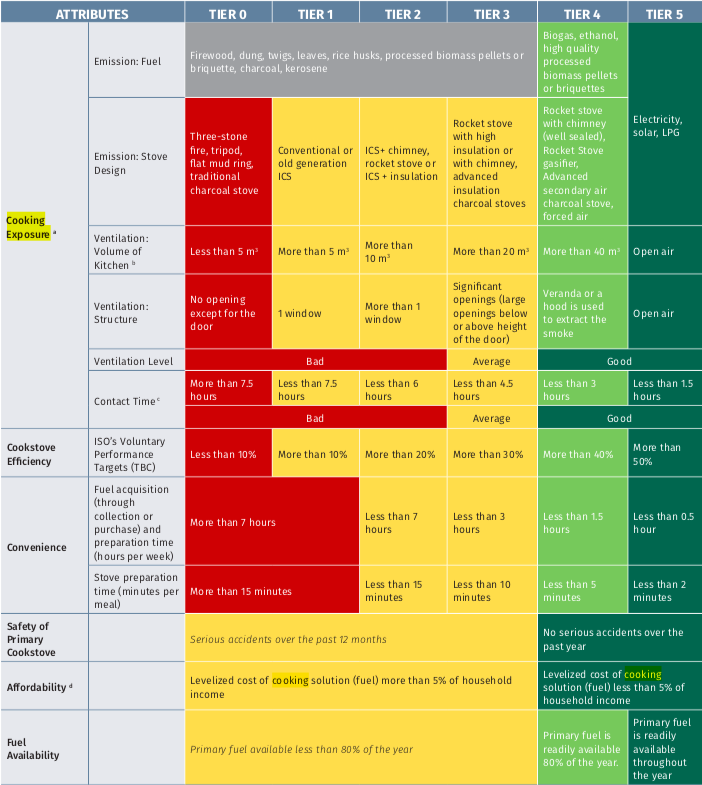

In [1]:
from IPython.display import Image
Image('images/cooking_tier.png')

## Fuel used for cooking

We consider the question: **I.18.In the last 12 months, did any household members die or have permanent limb (bodily injury) damage because of the electricity ?**

Biomass fuel energy from plants and animals: wood, crops, garbage,landfill gax, alcohol fuel, corresponding to:

- Peat - 3
- Charcoal - 4
- Wood - 5
- Animal Waste/Dung - 7
- Crop Residue/ Plant Biomass - 8
- Saw dust - 9
- Biomass briquette - 11
- Processed biomass (pellets)/woodchips - 12
- Ethanol - 13 
- Biogas - 14
- Garbage/plastic - 18

In [28]:
# This question is not available in the main dataset, so I load the I.csv section.
data = main[['Household Identification','habitat']]
data = data.rename(columns = {'Household Identification': 'HHID'})

data_I = data_I.drop_duplicates(subset=['HHID'])
data_I = pd.merge(data, data_I, on='HHID')

data_I18 = data_I[['HHID','I18A','I18B', 'habitat']].dropna()


### Use of Biomass

In [5]:
indexes = [3, 4, 5, 7, 8, 9, 11, 12, 13, 14, 18]
count_biomass = 0
total = len(data_I18)

for i in range(len(indexes)):
    count_biomass += len(data_I18[data_I18['I18A'] == indexes[i]])

#The percentage of household cooking with biomass is of 99.53703703703704. According to MTF: 99.6%


In [6]:
# Nationwide
counts_nat = []
counts_nat_perc = []

# Rural areas
counts_rur = []
counts_rur_perc = []

# Urban areas
counts_urb = []
counts_urb_perc = []


counts_nat.append(len(data_I18[data_I18['I18A']== 4]))
counts_nat.append(len(data_I18[data_I18['I18A']== 5]))
counts_nat.append(total- sum(counts_nat))

for i in range(len(counts_nat)):
    counts_nat_perc.append(100*counts_nat[i]/total)


data_I18_rur =  data_I18[data_I18['habitat']== 'rural']
total_rur    = len(data_I18_rur)
counts_rur.append(len(data_I18_rur[data_I18_rur['I18A']== 4]))
counts_rur.append(len(data_I18_rur[data_I18_rur['I18A']== 5]))
counts_rur.append(total_rur- sum(counts_rur))
for i in range(len(counts_rur)):
    counts_rur_perc.append(100*counts_rur[i]/total_rur)

    
data_I18_urb =  data_I18[data_I18['habitat']== 'urban']
total_urb = len(data_I18_urb)
counts_urb.append(len(data_I18_urb[data_I18_urb['I18A']== 4]))
counts_urb.append(len(data_I18_urb[data_I18_urb['I18A']== 5]))
counts_urb.append(total_urb - sum(counts_urb))

for i in range(len(counts_urb)):
    counts_urb_perc.append(100*counts_urb[i]/total_urb)

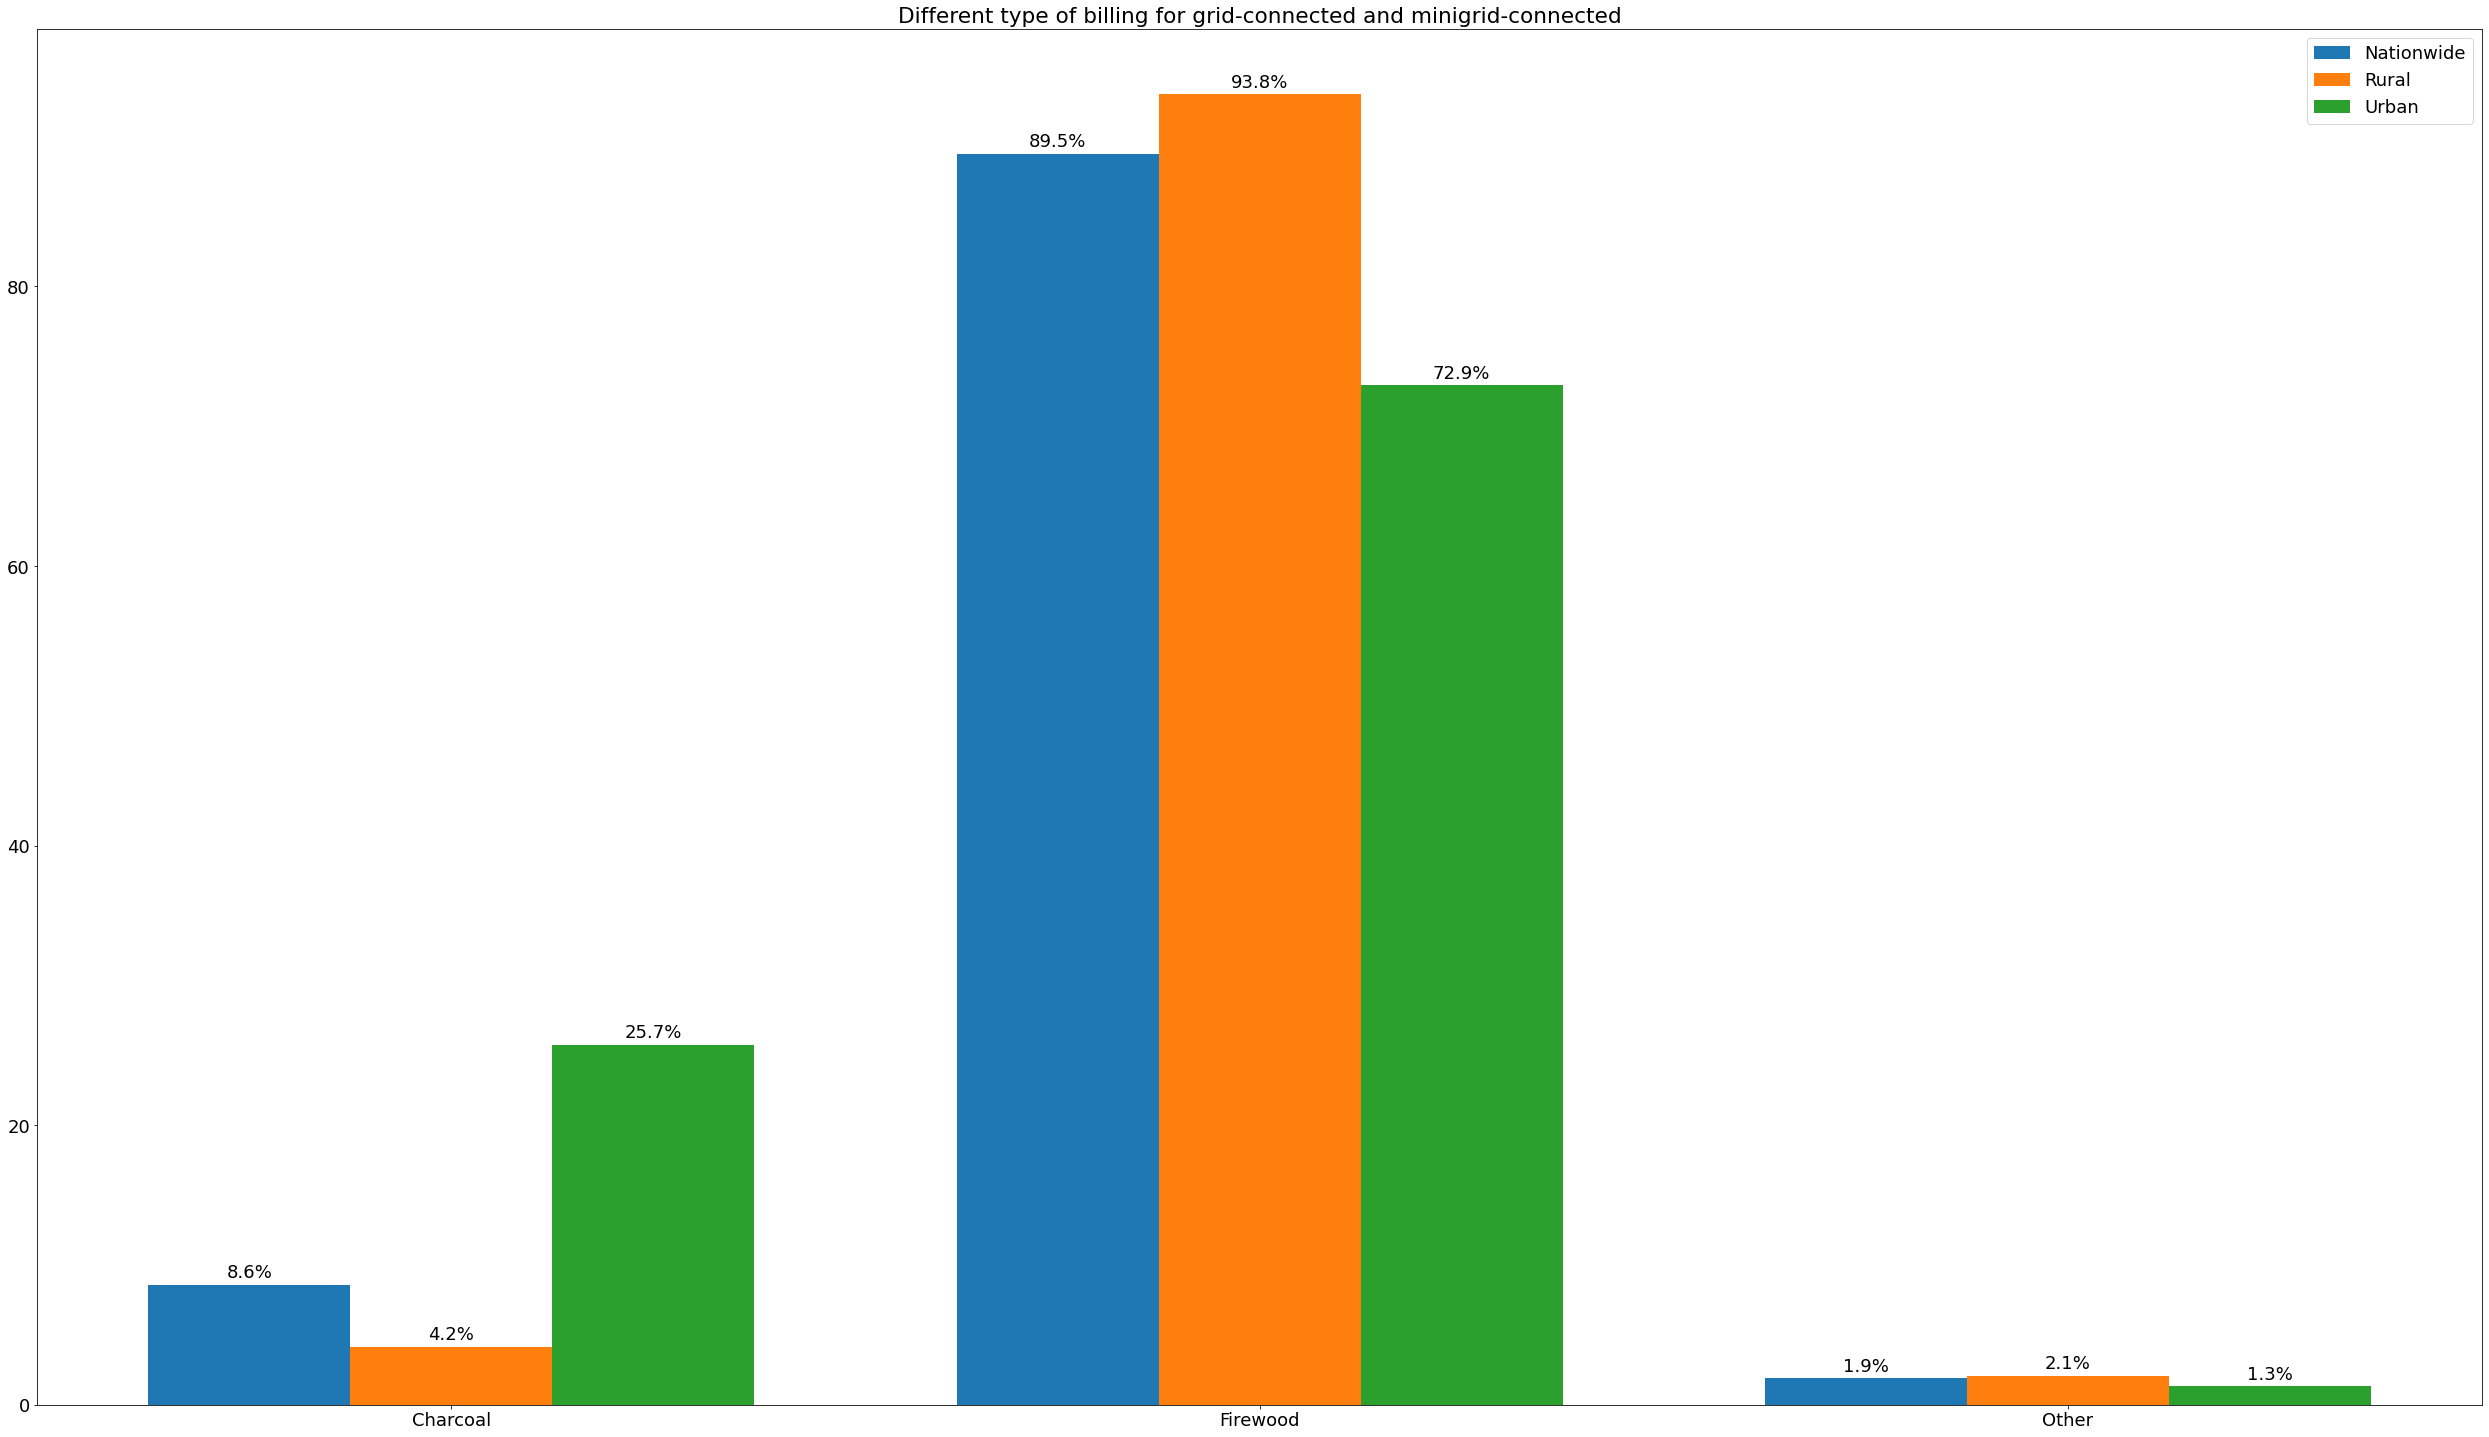

In [7]:
labels = ['Charcoal','Firewood','Other']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig,ax = plt.subplots(figsize=(35,20))
rects1 = ax.bar(x - width, counts_nat_perc, width, label='Nationwide')
rects2 = ax.bar(x, counts_rur_perc, width, label='Rural')
rects3 = ax.bar(x+ width, counts_urb_perc, width, label='Urban')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}%'.format(round(height,1)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Different type of billing for grid-connected and minigrid-connected')
plt.show()


**According to the MTF report:**  
Urban households cook predominantly with charcoal (63.4%) compared to 25.7% here, followed by firewood (34.1%) compared to 72.9% found here. In the report rural households mostly cook with firewood (94.7%), which is similar than what we found (93.8%).

Thus, the results are similar for Rural households but not for the urban households.

## Type of stove

We consider the question: 
**I.3: In the last 12 months, which cookstove did your household use for preparing meals?**

In [8]:
data_I3 =  data_I[['HHID','I3','habitat']].dropna()

In [9]:
question_stove_type = 'I3'
stove_types = []
stove_types_rur = []
stove_types_urb = []
stove_labels = ['Stone/Fire stove','Other Self-built stove','Manufactured stove', 'Other']

# Nationwide
total_I3 = len(data_I3)
for i in range(1,4):
    stove_types.append(len(data_I3[data_I3[question_stove_type]==i]))
stove_types.append(len(data_I3[data_I3[question_stove_type]==555]))

stove_types_perc = []
for i in range(len(stove_types)-1):
    stove_types_perc.append(stove_types[i]*100/total_I3)
    
# Rural 
data_I3_rur = data_I3[data_I3['habitat'] == 'rural']
total_I3_rur = len(data_I3_rur)
for i in range(1,4):
    stove_types_rur.append(len(data_I3_rur[data_I3_rur[question_stove_type]==i]))
stove_types_rur.append(len(data_I3_rur[data_I3_rur[question_stove_type]==555]))

stove_types_perc_rur = []
for i in range(len(stove_types_rur) - 1):
    stove_types_perc_rur.append(stove_types_rur[i]*100/total_I3_rur)
    
# Urban 
data_I3_urb = data_I3[data_I3['habitat'] == 'urban']
total_I3_urb = len(data_I3_urb)
for i in range(1,4):
    stove_types_urb.append(len(data_I3_urb[data_I3_urb[question_stove_type]==i]))
stove_types_urb.append(len(data_I3_urb[data_I3_urb[question_stove_type]==555]))

stove_types_perc_urb = []
for i in range(len(stove_types_urb)-1):
    stove_types_perc_urb.append(stove_types_urb[i]*100/total_I3_urb)    
    


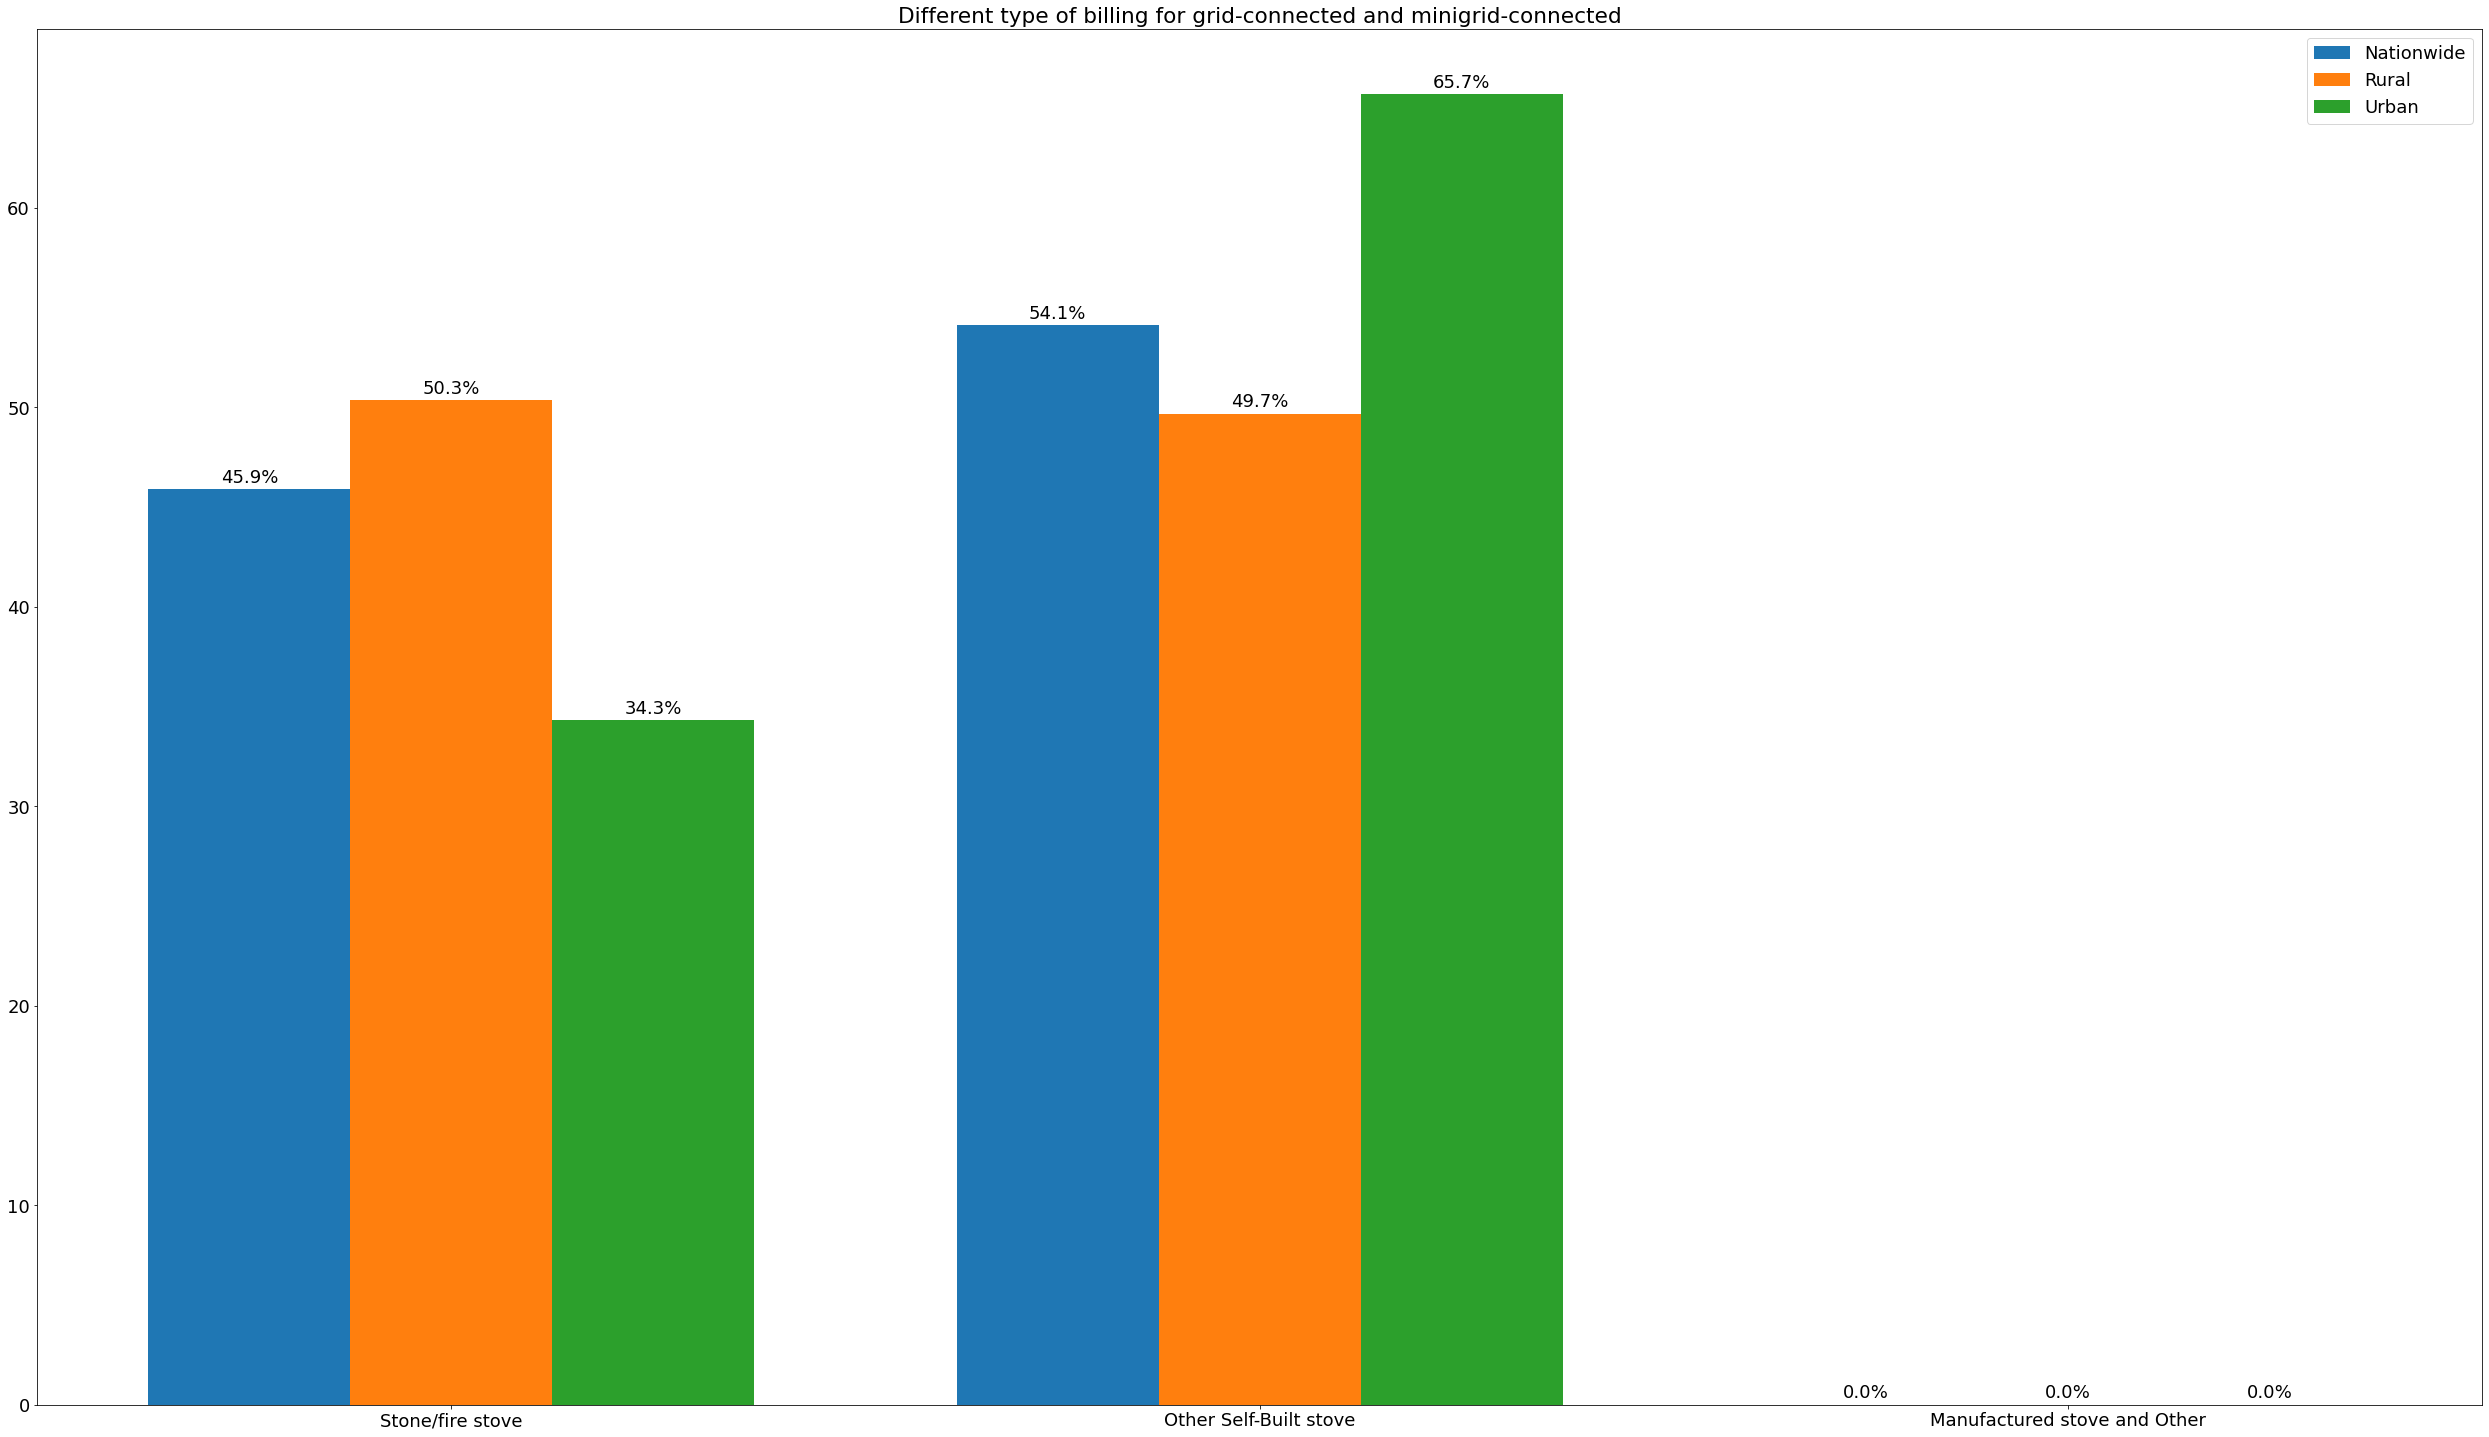

In [10]:
labels = ['Stone/fire stove','Other Self-Built stove', 'Manufactured stove and Other']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig,ax = plt.subplots(figsize=(35,20))
rects1 = ax.bar(x - width, stove_types_perc, width, label='Nationwide')
rects2 = ax.bar(x, stove_types_perc_rur, width, label='Rural')
rects3 = ax.bar(x+ width, stove_types_perc_urb, width, label='Urban')


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Different type of billing for grid-connected and minigrid-connected')
plt.show()

##### Comments:  
**100%** of the households that are using biomass are using **Stone/Fire stoves**. 

## Safety

We consider the question: 
**I.31: In the last 12 months, what type of harm/injury did your household face from this cookstove?**

In [11]:
data_I31 = data_I[['HHID','I31_1','I31_2','I31_3','I31_4','I31_5','I31_6','I31_7','I31_8','habitat']]


# Accidents correspond to index: 1-2-3-4

In [12]:
# Nationwide
accident_nat_perc = []
total_nat = len(data_I31)
accident_nat_perc.append(100*(len(data_I31[data_I31['I31_1'] == 1]) + len(data_I31[data_I31['I31_2']== 2]) + len(data_I31[data_I31['I31_3']== 3]) + len(data_I31[data_I31['I31_4']== 4]))/total_nat)
accident_nat_perc.append(100 - sum(accident_nat_perc))

# Rural areas
accident_rur_perc = []
data_I31_rur =  data_I31[data_I31['habitat'] == 'rural']
total_rur    = len(data_I31_rur)
accident_rur_perc.append(100*(len(data_I31_rur[data_I31_rur['I31_1'] == 1]) + len(data_I31_rur[data_I31_rur['I31_2']== 2]) + len(data_I31_rur[data_I31_rur['I31_3']== 3]) + len(data_I31_rur[data_I31_rur['I31_4']== 4]))/total_rur)
accident_rur_perc.append(100 - sum(accident_rur_perc))


# Urban areas
accident_urb_perc = []
data_I31_urb =  data_I31[data_I31['habitat'] == 'urban']
total_urb    = len(data_I31_urb)
accident_urb_perc.append(100*(len(data_I31_urb[data_I31_urb['I31_1']== 1]) + len(data_I31_urb[data_I31_urb['I31_2']== 2]) + len(data_I31_urb[data_I31_urb['I31_3']== 3]) + len(data_I31_urb[data_I31_urb['I31_4']== 4]))/total_urb)
accident_urb_perc.append(100 - sum(accident_urb_perc))



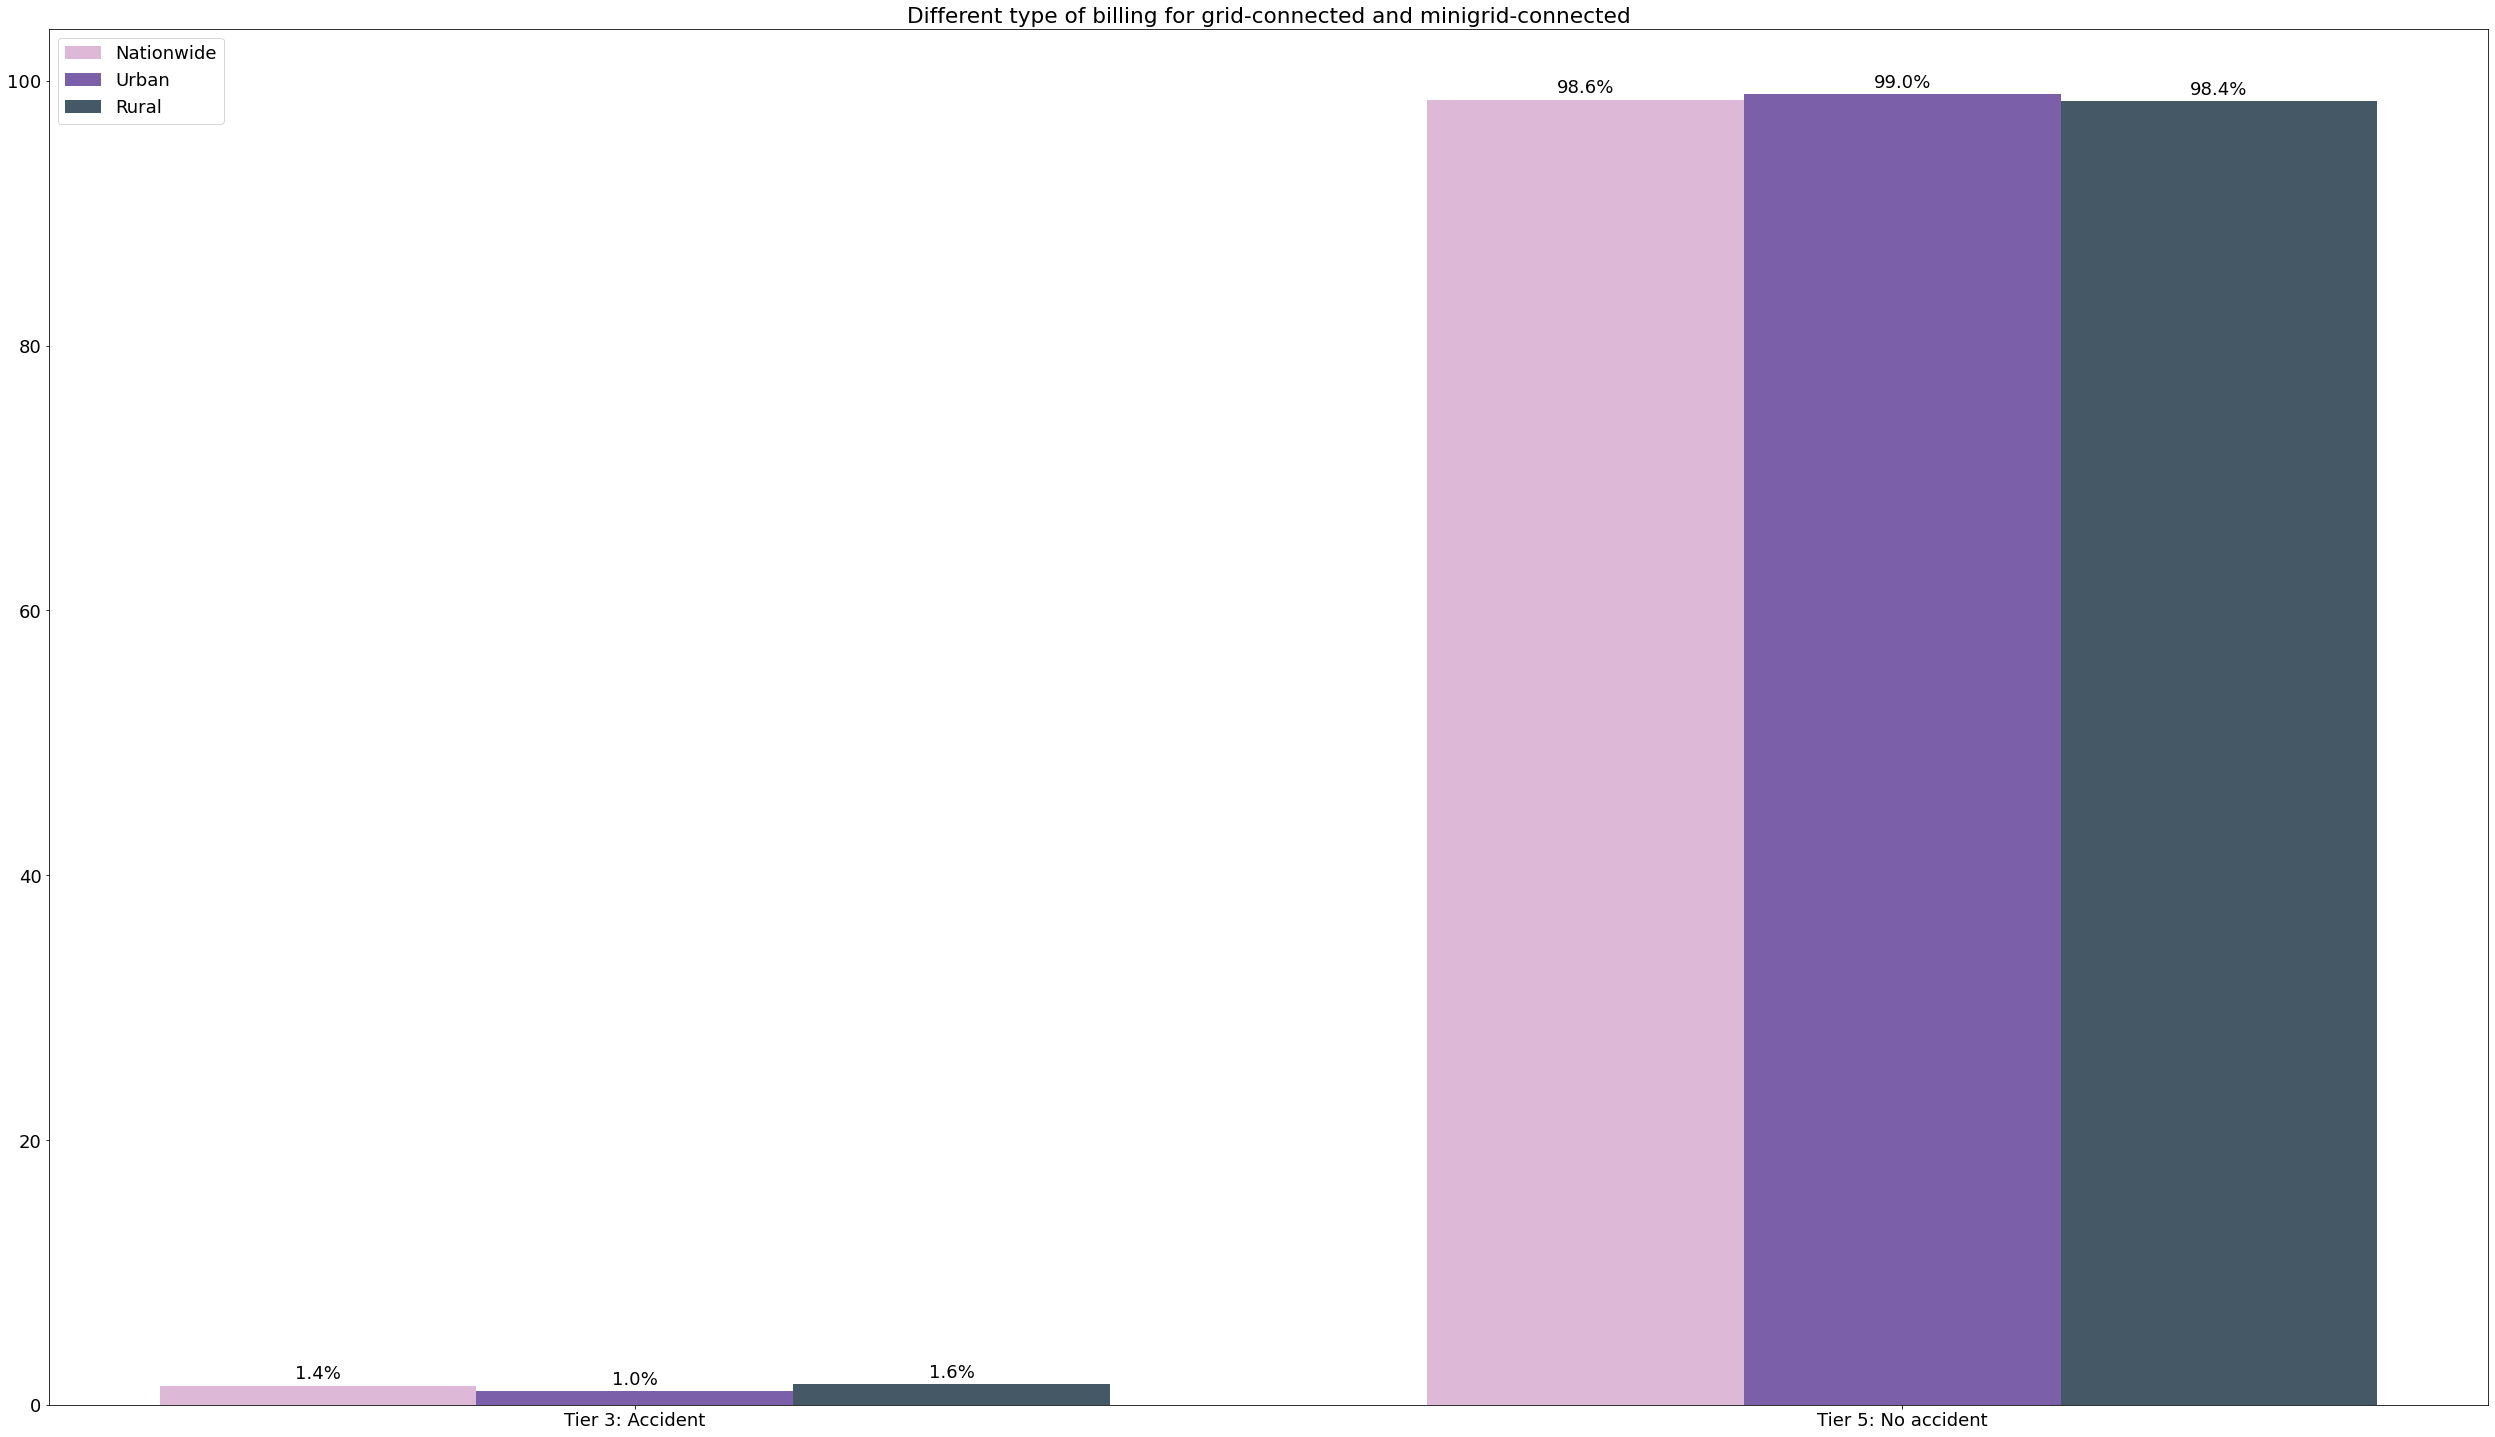

In [23]:
colors=AREA_COLORS
labels = ['Tier 3: Accident','Tier 5: No accident']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig,ax = plt.subplots(figsize=(35,20))
rects1 = ax.bar(x - width, accident_nat_perc, width, label='Nationwide',color=colors[0])
rects2 = ax.bar(x , accident_urb_perc, width, label='Urban', color=colors[1])
rects3 = ax.bar(x+ width, accident_rur_perc, width, label='Rural',color=colors[2])



autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Different type of billing for grid-connected and minigrid-connected')
plt.show()


**According to the MTF report:**

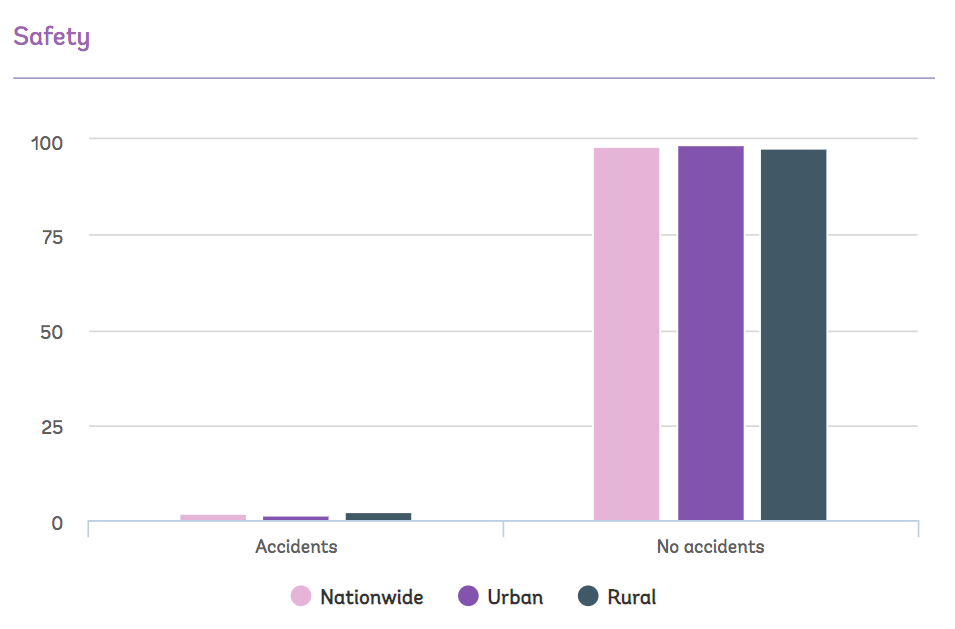

In [18]:
Image('images/MTF_cooking_accident.png',width=1000, height=1000)

In the MTF report, the percentages of accident are:  
- Nationwide:2%
- Rural: 2.1%
- Urban: 1.2%

Thus, our results are in line with the MTF results.

## Availability 

We consider the question: 
**I.19: In the last 12 months, how often was the [FUEL TYPE] available?**



In [29]:
data_I19 = data_I[['HHID','I19A', 'habitat']].dropna()

In [30]:
# Nationwide
counts_nat = []
counts_nat_perc = []

# Rural areas
counts_rur = []
counts_rur_perc = []

# Urban areas
counts_urb = []
counts_urb_perc = []

counts_nat.append(len(data_I19[data_I19['I19A']== 3]) +len(data_I19[data_I19['I19A']== 4]) )
counts_nat.append(len(data_I19[data_I19['I19A']== 2]))
counts_nat.append(len(data_I19[data_I19['I19A']== 1]))
for i in range(len(counts_nat)):
    counts_nat_perc.append(100*counts_nat[i]/total)


data_I19_rur =  data_I19[data_I19['habitat']== 'rural']
total_rur    = len(data_I19_rur)
counts_rur.append(len(data_I19_rur[data_I19_rur['I19A']== 3])+len(data_I19_rur[data_I19_rur['I19A'] == 4]))
counts_rur.append(len(data_I19_rur[data_I19_rur['I19A']== 2]))
counts_rur.append(len(data_I19_rur[data_I19_rur['I19A']== 1]))

for i in range(len(counts_rur)):
    counts_rur_perc.append(100*counts_rur[i]/total_rur)  


data_I19_urb =  data_I19[data_I19['habitat']== 'urban']
total_urb = len(data_I19_urb)
counts_urb.append(len(data_I19_urb[data_I19_urb['I19A']== 3]) +len(data_I19_urb[data_I19_urb['I19A']== 4]) )
counts_urb.append(len(data_I19_urb[data_I19_urb['I19A']== 2]))
counts_urb.append(len(data_I19_urb[data_I19_urb['I19A']== 1]))

for i in range(len(counts_urb)):
    counts_urb_perc.append(100*counts_urb[i]/total_urb)

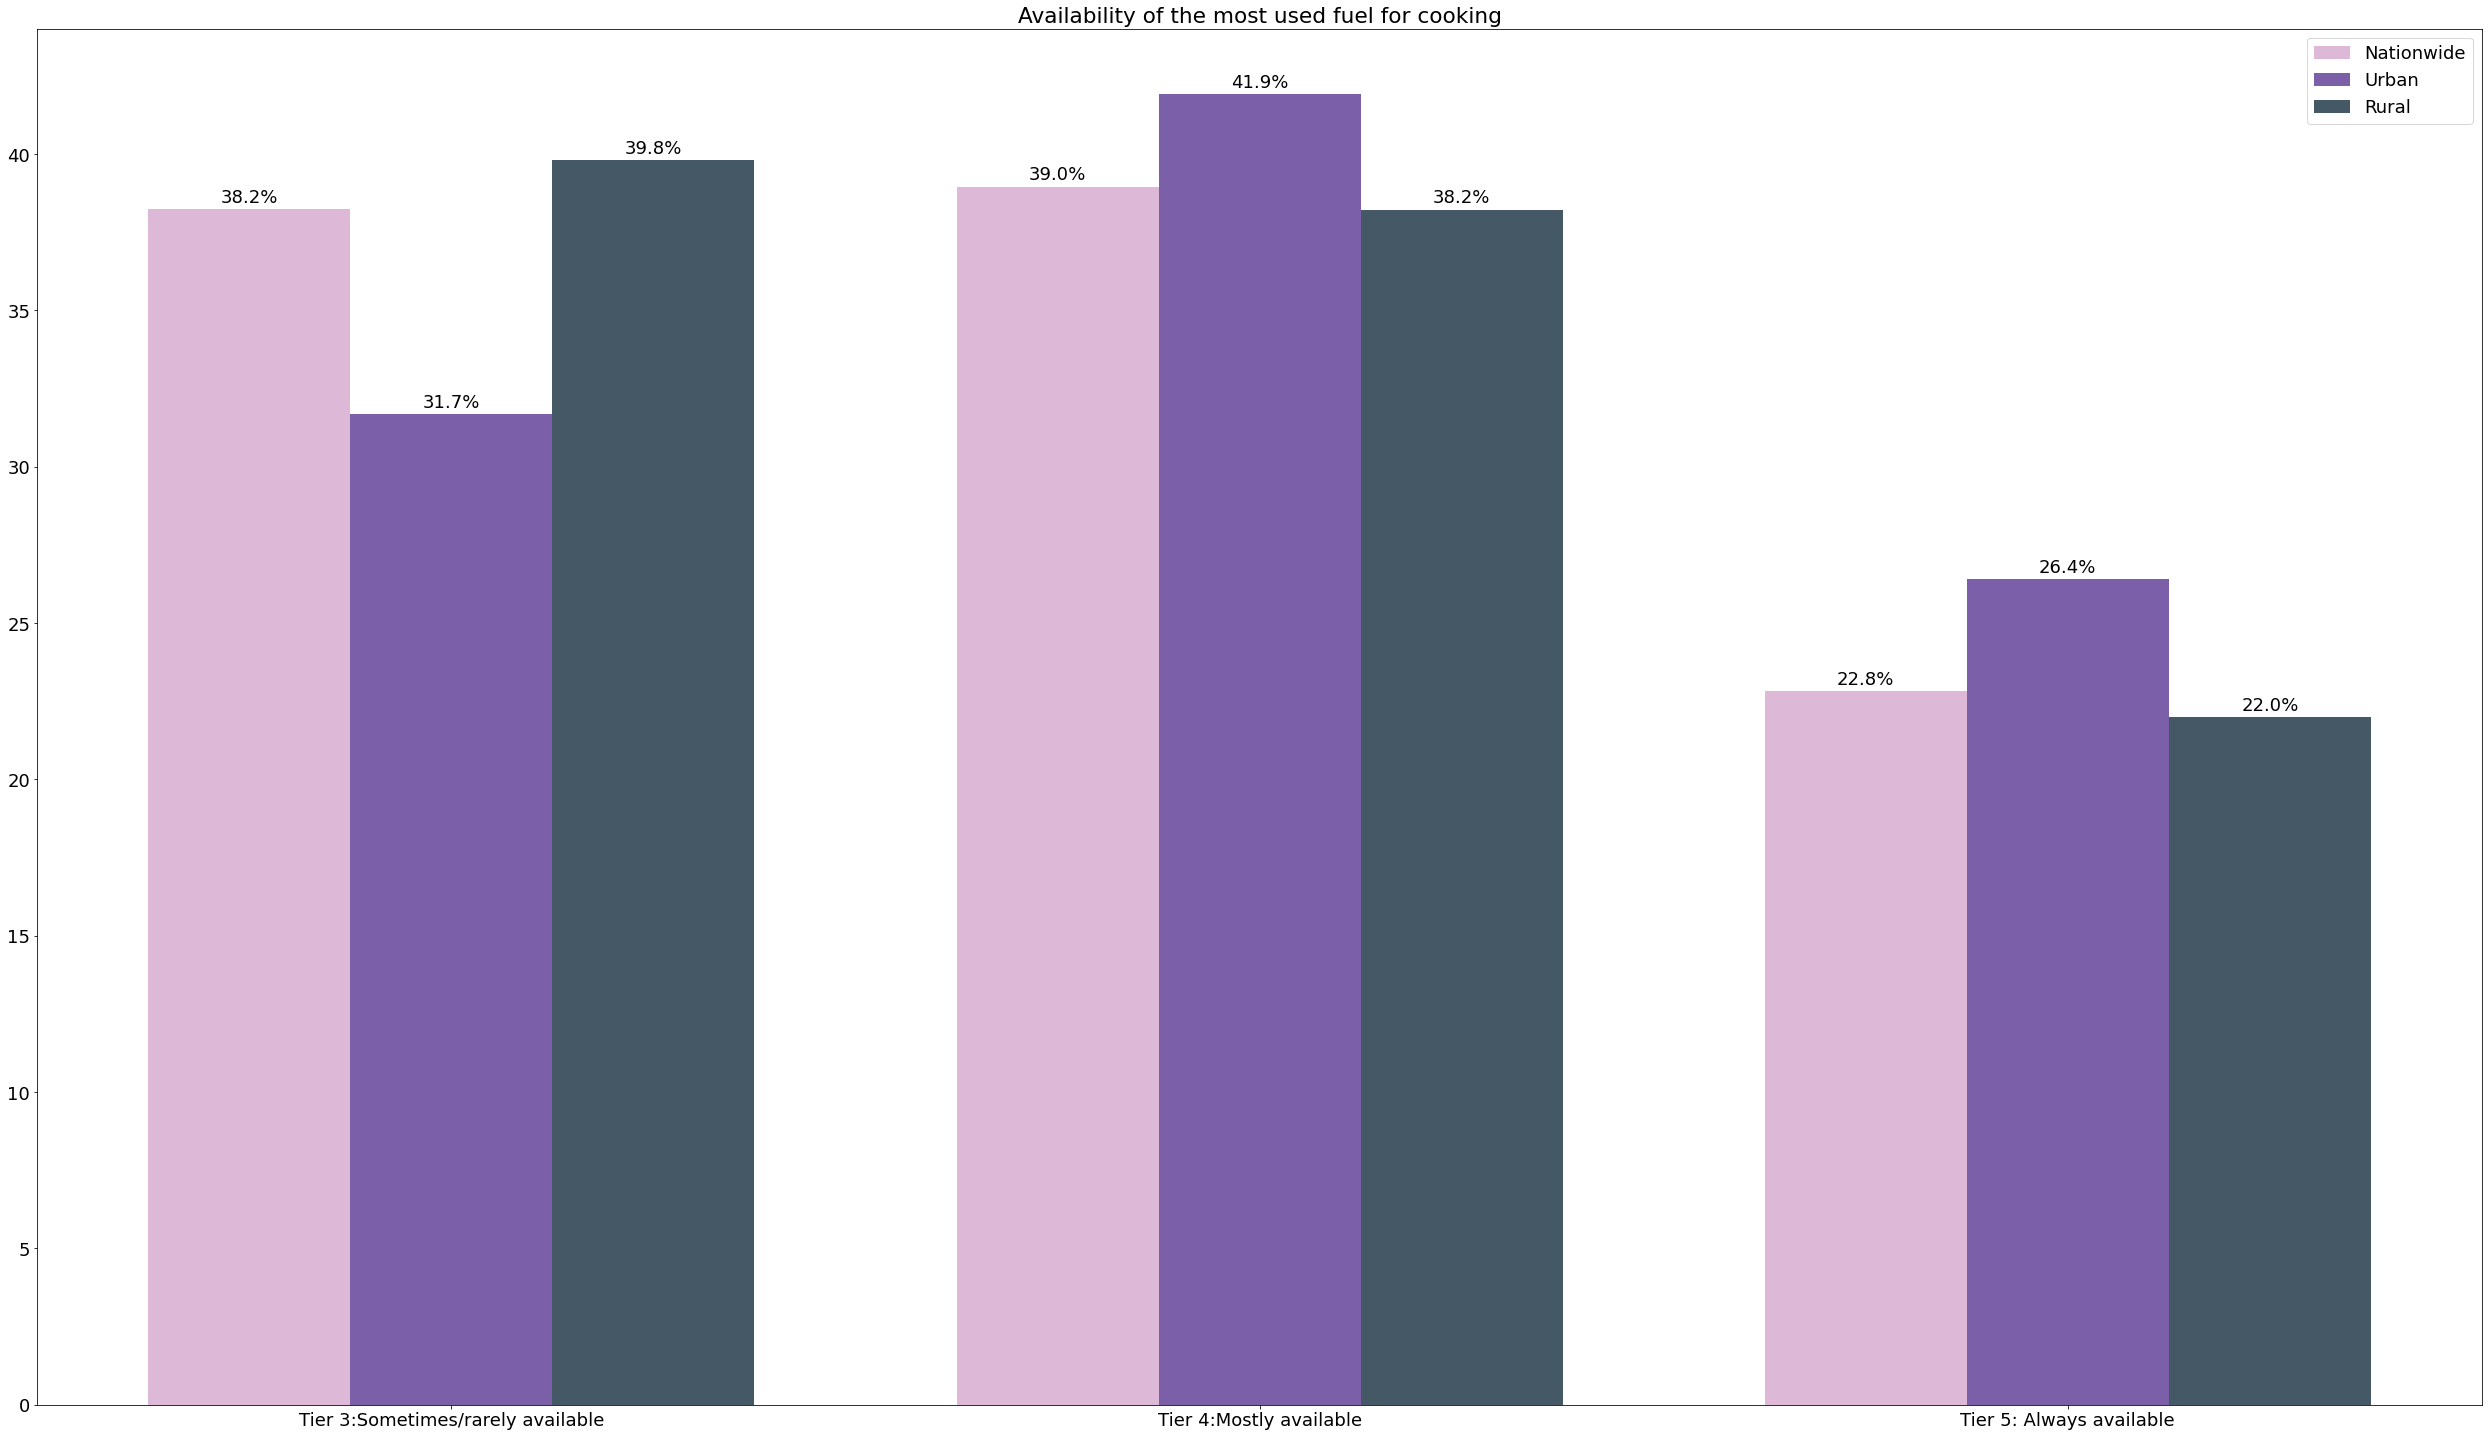

In [31]:
labels = ['Tier 3:Sometimes/rarely available','Tier 4:Mostly available','Tier 5: Always available']

x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig,ax = plt.subplots(figsize=(35,20))
rects1 = ax.bar(x - width, counts_nat_perc, width, label='Nationwide',color=colors[0])
rects2 = ax.bar(x, counts_urb_perc, width, label='Urban',color=colors[1])
rects3 = ax.bar(x + width, counts_rur_perc, width, label='Rural',color=colors[2])


autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
plt.title('Availability of the most used fuel for cooking')
plt.show()


**According to the MTF report:**

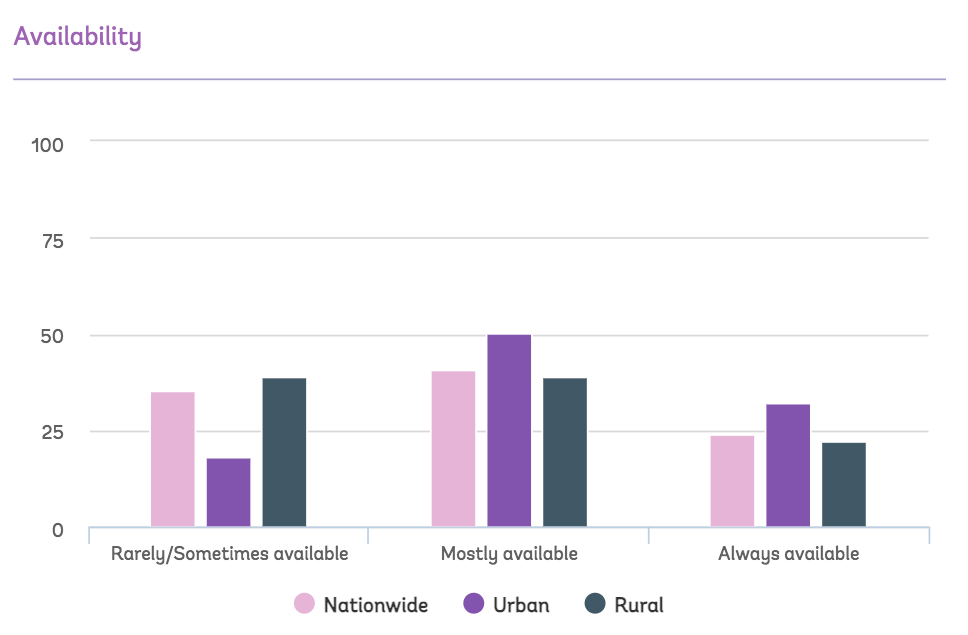

In [25]:
Image('images/MTF_availability_cooking.png')

In this above plots, the percentages are: 

- Rarely/Sometimes : 
Urban: 18%
Nationwide: 35.5%
Rural: 39.1%

- Mostly:
Urban: 50.1%
Nationwide: 40.8%
Rural: 38.8%

- Always:
Urban: 31.9%
Nationwide: 23.9%
Rural: 22.1%

Thus, our results are in line with the report.


## Convenience

We consider the question:  
**I.21: How much time do household members spend preparing the cookstove and fuel for each meal on average [including setting up the fuel and turning on the stove but not including gathering fuel or cooking time]?**

Answer in minutes.

In [34]:
data_I21 = data_I[['HHID','I21', 'habitat']].dropna()
data_I21

,HHID,I21,habitat
0,1102020811001,3.0,urban
1,1102020811002,5.0,urban
3,1102020811004,10.0,urban
4,1102020811005,5.0,urban
6,1102020811007,10.0,urban
...,...,...,...
3288,5714040157076,35.0,rural
3290,5714040157078,10.0,rural
3292,5714040157082,30.0,rural
3293,5714040157083,5.0,rural


In [35]:
Cooking_tier = []
convenience_question = 'I21'
for index,row in data_I21.iterrows():  
    if row[convenience_question] >= 15:
        Cooking_tier.append(1)        
    elif row[convenience_question] < 15 and row[convenience_question] >= 10:
        Cooking_tier.append(2)
    elif row[convenience_question] < 10 and row[convenience_question] >= 5:
        Cooking_tier.append(3)  
    elif row[convenience_question] < 5 and row[convenience_question] >= 2:
        Cooking_tier.append(4)  
    elif row[convenience_question] < 2:
        Cooking_tier.append(5)     
    else:
        Cooking_tier.append(np.nan)

        
data_I21['Cookin_Tier'] = Cooking_tier    
        

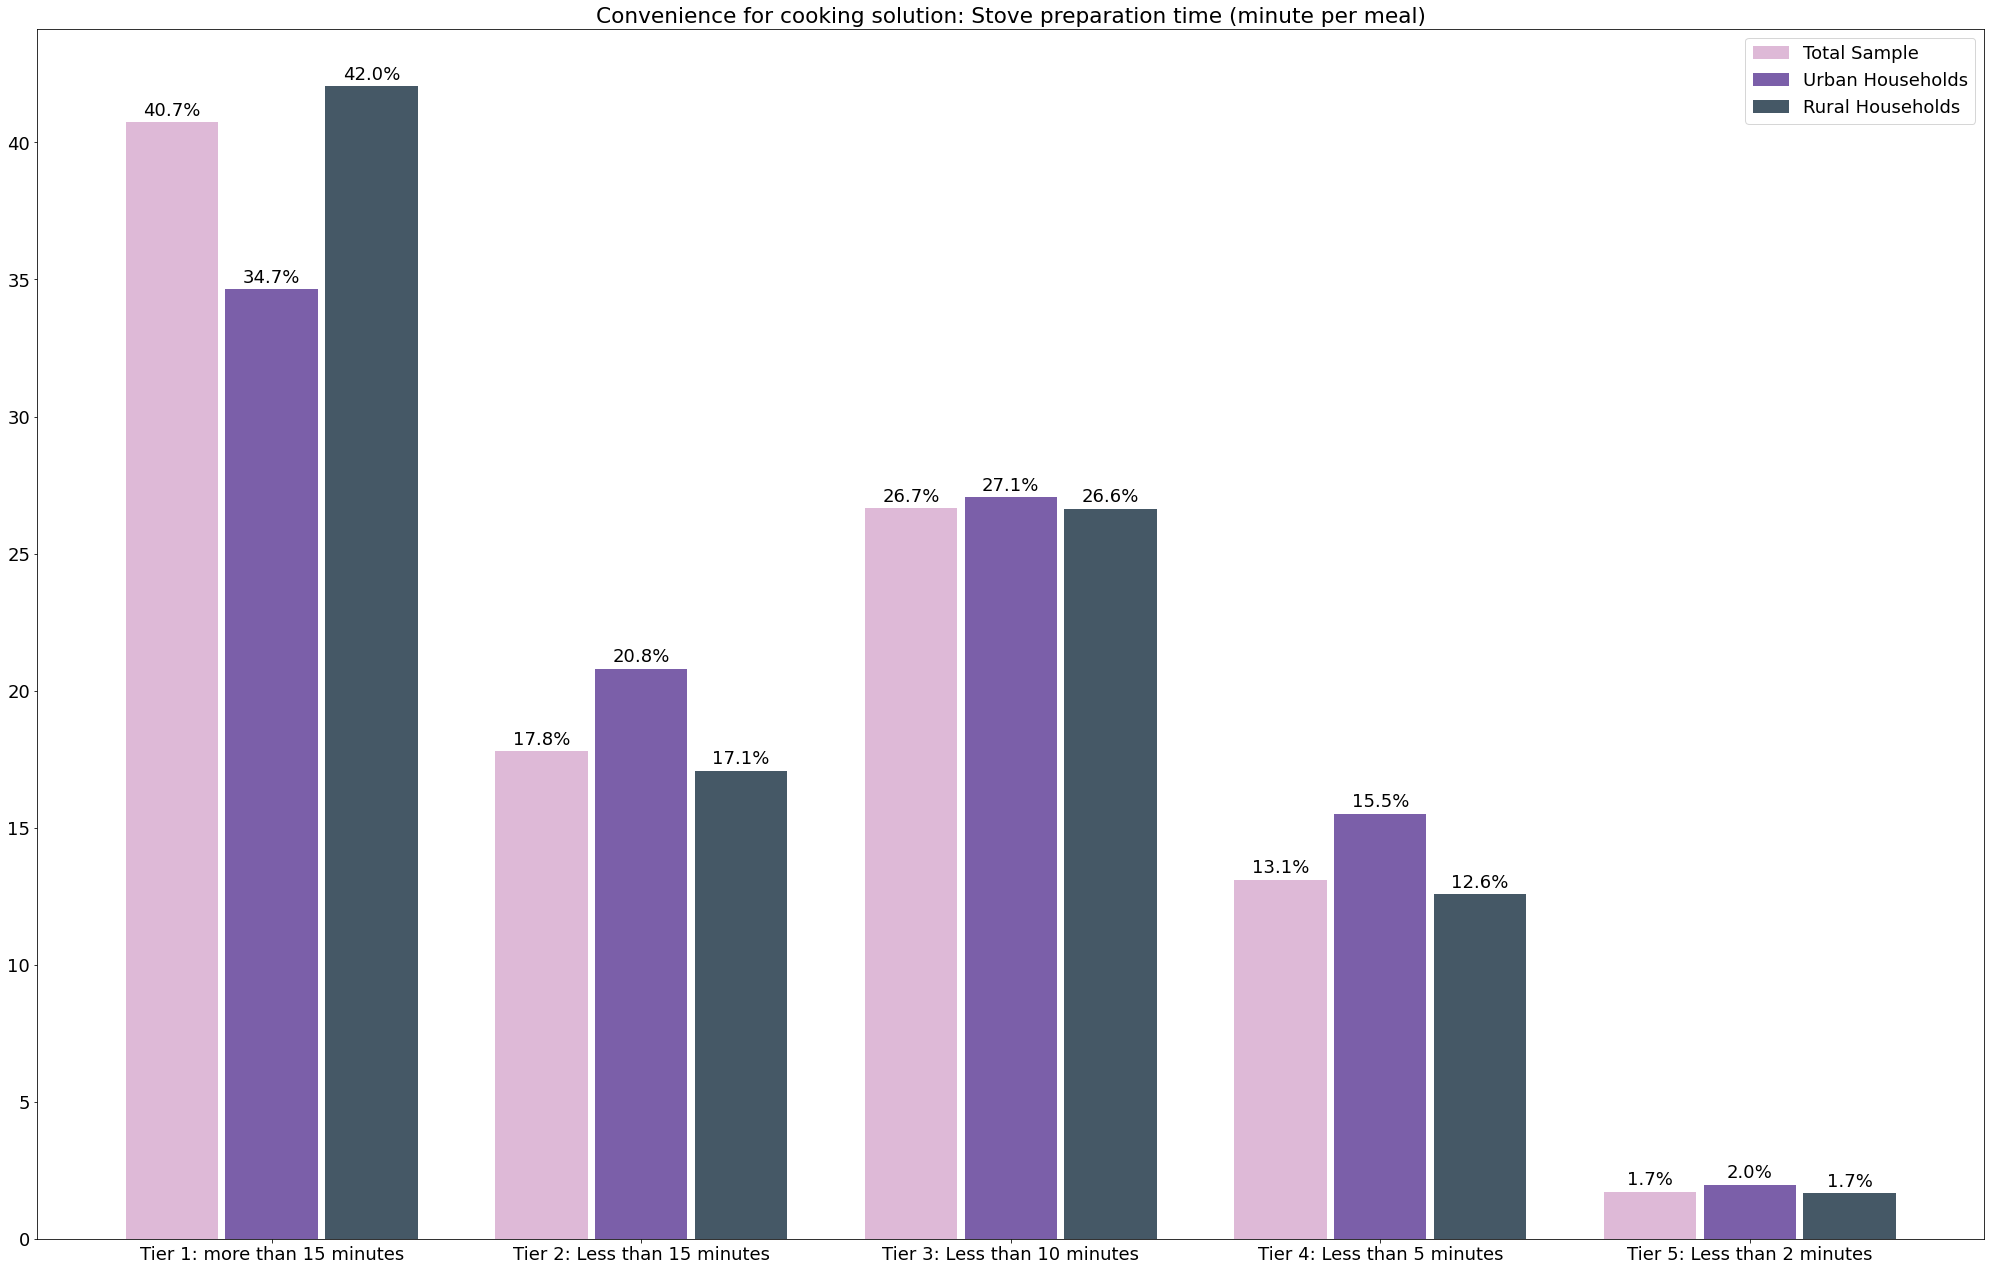

In [36]:
plot_tier_distribution(data_I21,'Cookin_Tier',values=[1,2,3,4,5],
                       labels= ['Tier 1: more than 15 minutes', 'Tier 2: Less than 15 minutes',"Tier 3: Less than 10 minutes", "Tier 4: Less than 5 minutes","Tier 5: Less than 2 minutes"],
                       title='Convenience for cooking solution: Stove preparation time (minute per meal)')


**According to the MTF report:**

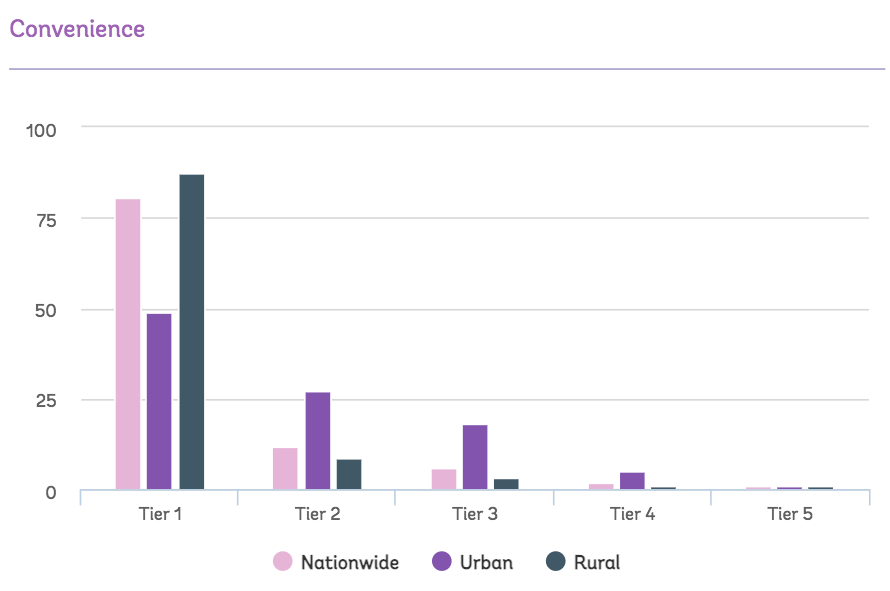

In [32]:
Image('images/convenience_cooking.png')

In this above plots, the percentages are: 

- Tier 1 : 
Urban: 49%
Nationwide: 80.4%
Rural: 87.3%

- Tier 2:
Urban: 27.2%
Nationwide: 12%
Rural: 8.6%

- Tier 3:
Urban: 18.1% 
Nationwide: 5.7%
Rural: 8.6%

- Tier 4:
Urban: 5.1%
Nationwide: 1.7%
Rural: 0.9%

- Tier 5:
Urban: 0.6%
Nationwide: 0.3%
Rural: 0.2%

## Cooking exposure

To calculate this attributes, we need to deal with:
- Emission:fuel,
- Emission: stove desgin
- Ventilation:Volume of Kitchen 
- Ventilation: structure 
- Ventilation Level 
- Contact Time

### 1- Emission: fuel

In [37]:
Fuel_tier = []
fuel_question = 'I18A'
for index,row in data_I18.iterrows():  
    if row[fuel_question] == 5 or row[fuel_question] == 4 or row[fuel_question] == 12 or row[fuel_question] == 11 or row[fuel_question] == 1 or row[fuel_question] == 7 or row[fuel_question] == 8 or row[fuel_question] == 9 or row[fuel_question] == 18 or row[fuel_question] == 3 or row[fuel_question] == 2 or row[fuel_question] == 10:
        Fuel_tier.append(3)       
    elif row[fuel_question] == 14 or row[fuel_question] == 13 or row[fuel_question] == 16:
        Fuel_tier.append(4)
    elif row[fuel_question] == 15 or row[fuel_question] == 6 or row[fuel_question] == 17:
        Fuel_tier.append(5)
    else:
        Fuel_tier.append(np.nan)

        
data_I18['Fuel_Tier'] = Fuel_tier



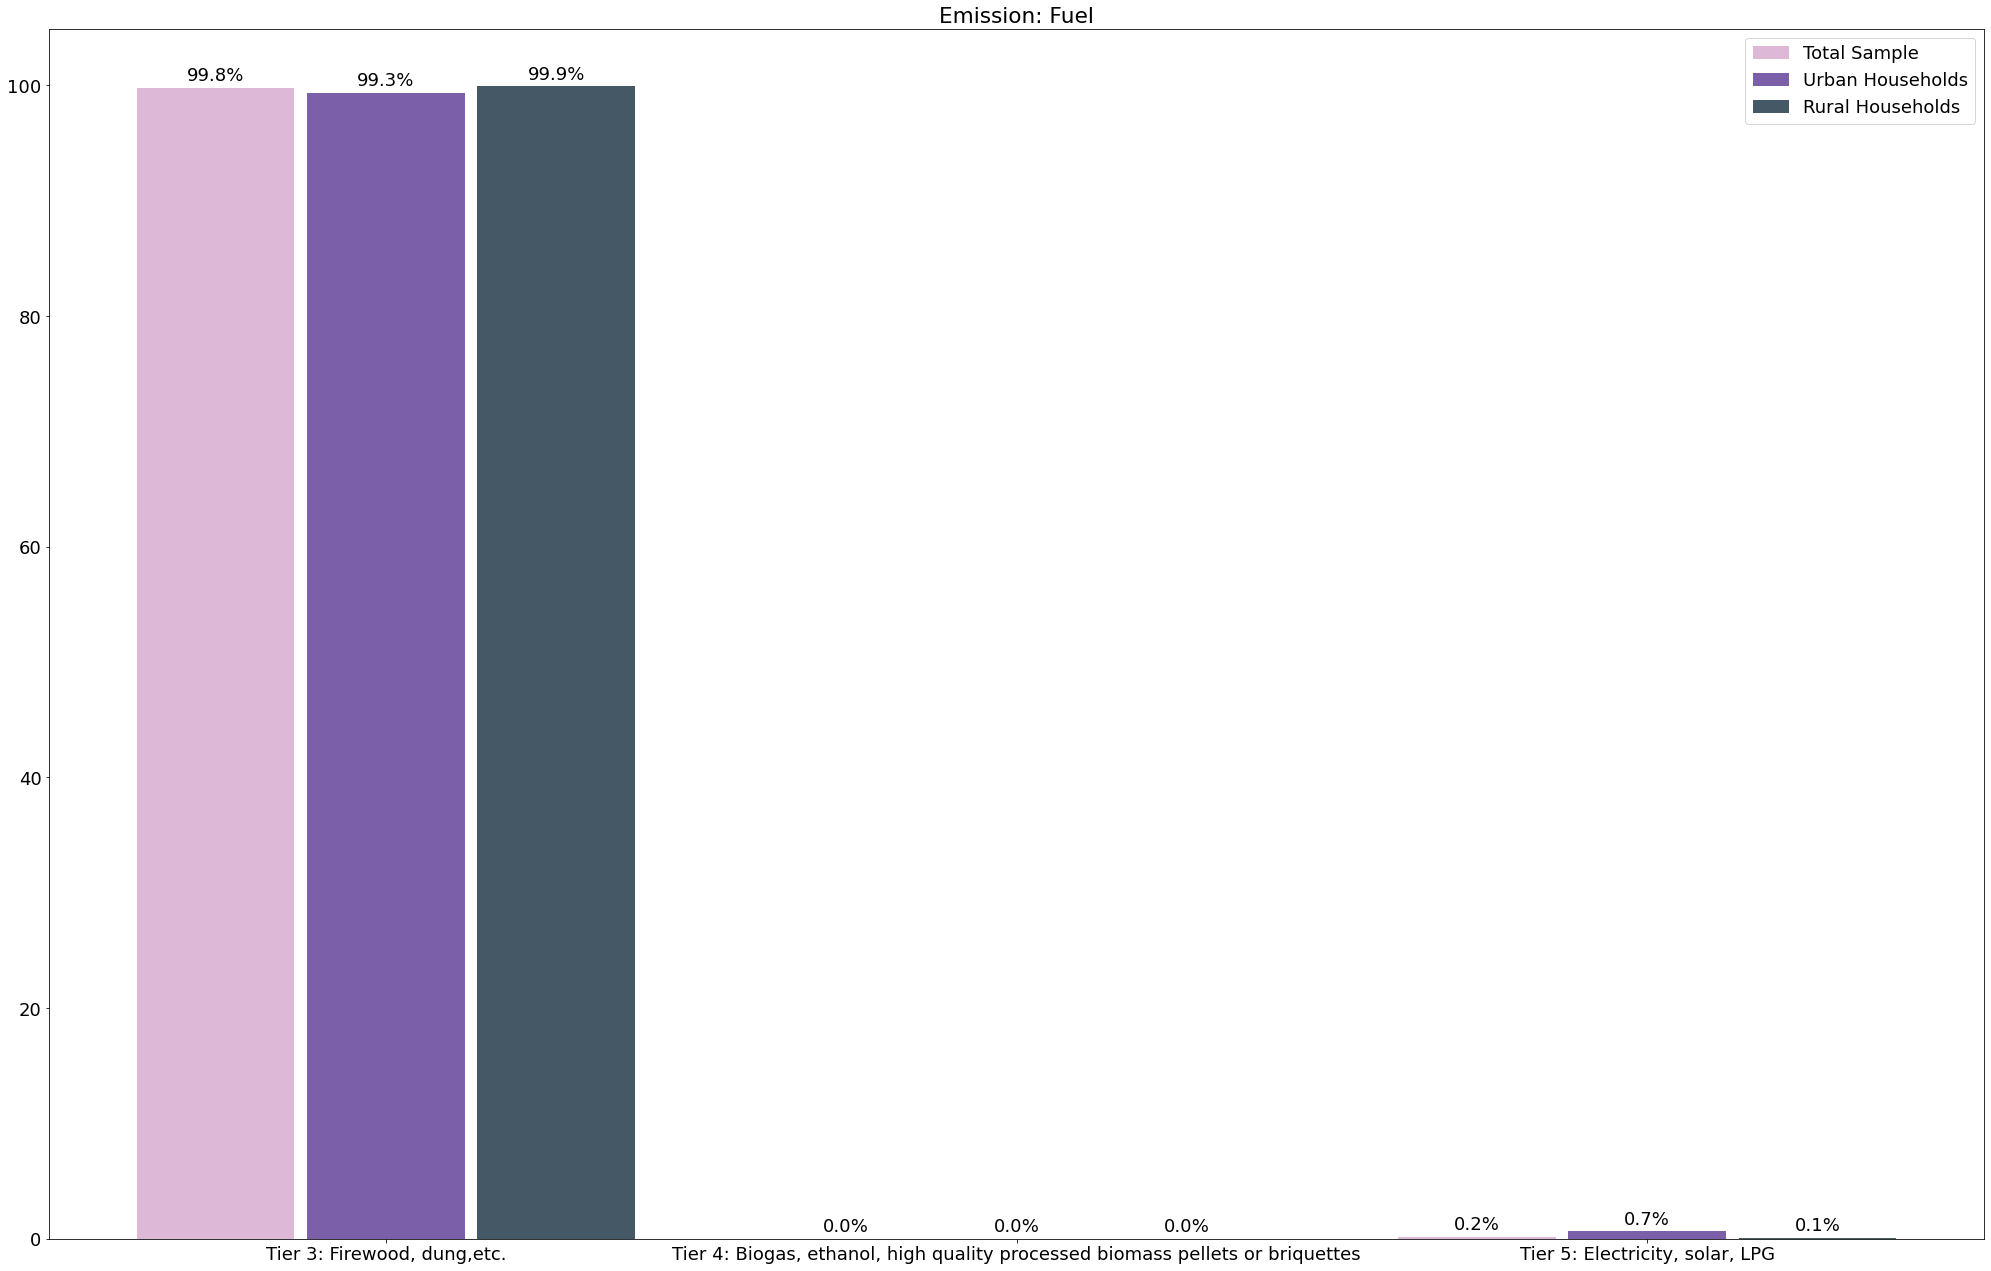

In [38]:
plot_tier_distribution(data_I18,'Fuel_Tier',values=[3,4,5],
                       labels= ['Tier 3: Firewood, dung,etc.', 'Tier 4: Biogas, ethanol, high quality processed biomass pellets or briquettes',"Tier 5: Electricity, solar, LPG"],
                       title='Emission: Fuel')


### 2- Ventilation: Structure

We consider the question:  
**I.15: What is the size of your main cooking space?**  
Area size in square meter.

In [39]:
data_I15 = main[['Household Identification','I15_What is the size of your main cooking space','I14_where did you normally cook with the cookstove', 'habitat']].dropna()
data_I15

,Household Identification,I15_What is the size of your main cooking space,I14_where did you normally cook with the cookstove,habitat
0,1102020811001,4.0,3,urban
4,1102020811005,1.0,3,urban
5,1102020811006,1.0,3,urban
6,1102020811007,8.0,3,urban
10,1102020811011,20.0,3,urban
...,...,...,...,...
3282,5712050557080,5.0,3,rural
3283,5714040157019,3.0,1,urban
3286,5714040157074,1.0,1,rural
3291,5714040157079,1.0,1,rural


In [40]:
Size = []
size_question = 'I15_What is the size of your main cooking space'
place_question = 'I14_where did you normally cook with the cookstove'
for index,row in data_I15.iterrows(): 
    if row[place_question] == 5:
        Size.append(5)
    else: 
        if row[size_question] <= 5:
            Size.append(0)       
        elif row[size_question] > 5 and row[size_question] <= 10:
            Size.append(1)
        elif row[size_question] > 10:
            Size.append(2)
        else:
            Size_tier.append(np.nan)

        
data_I15['Size_kitchen'] = Size


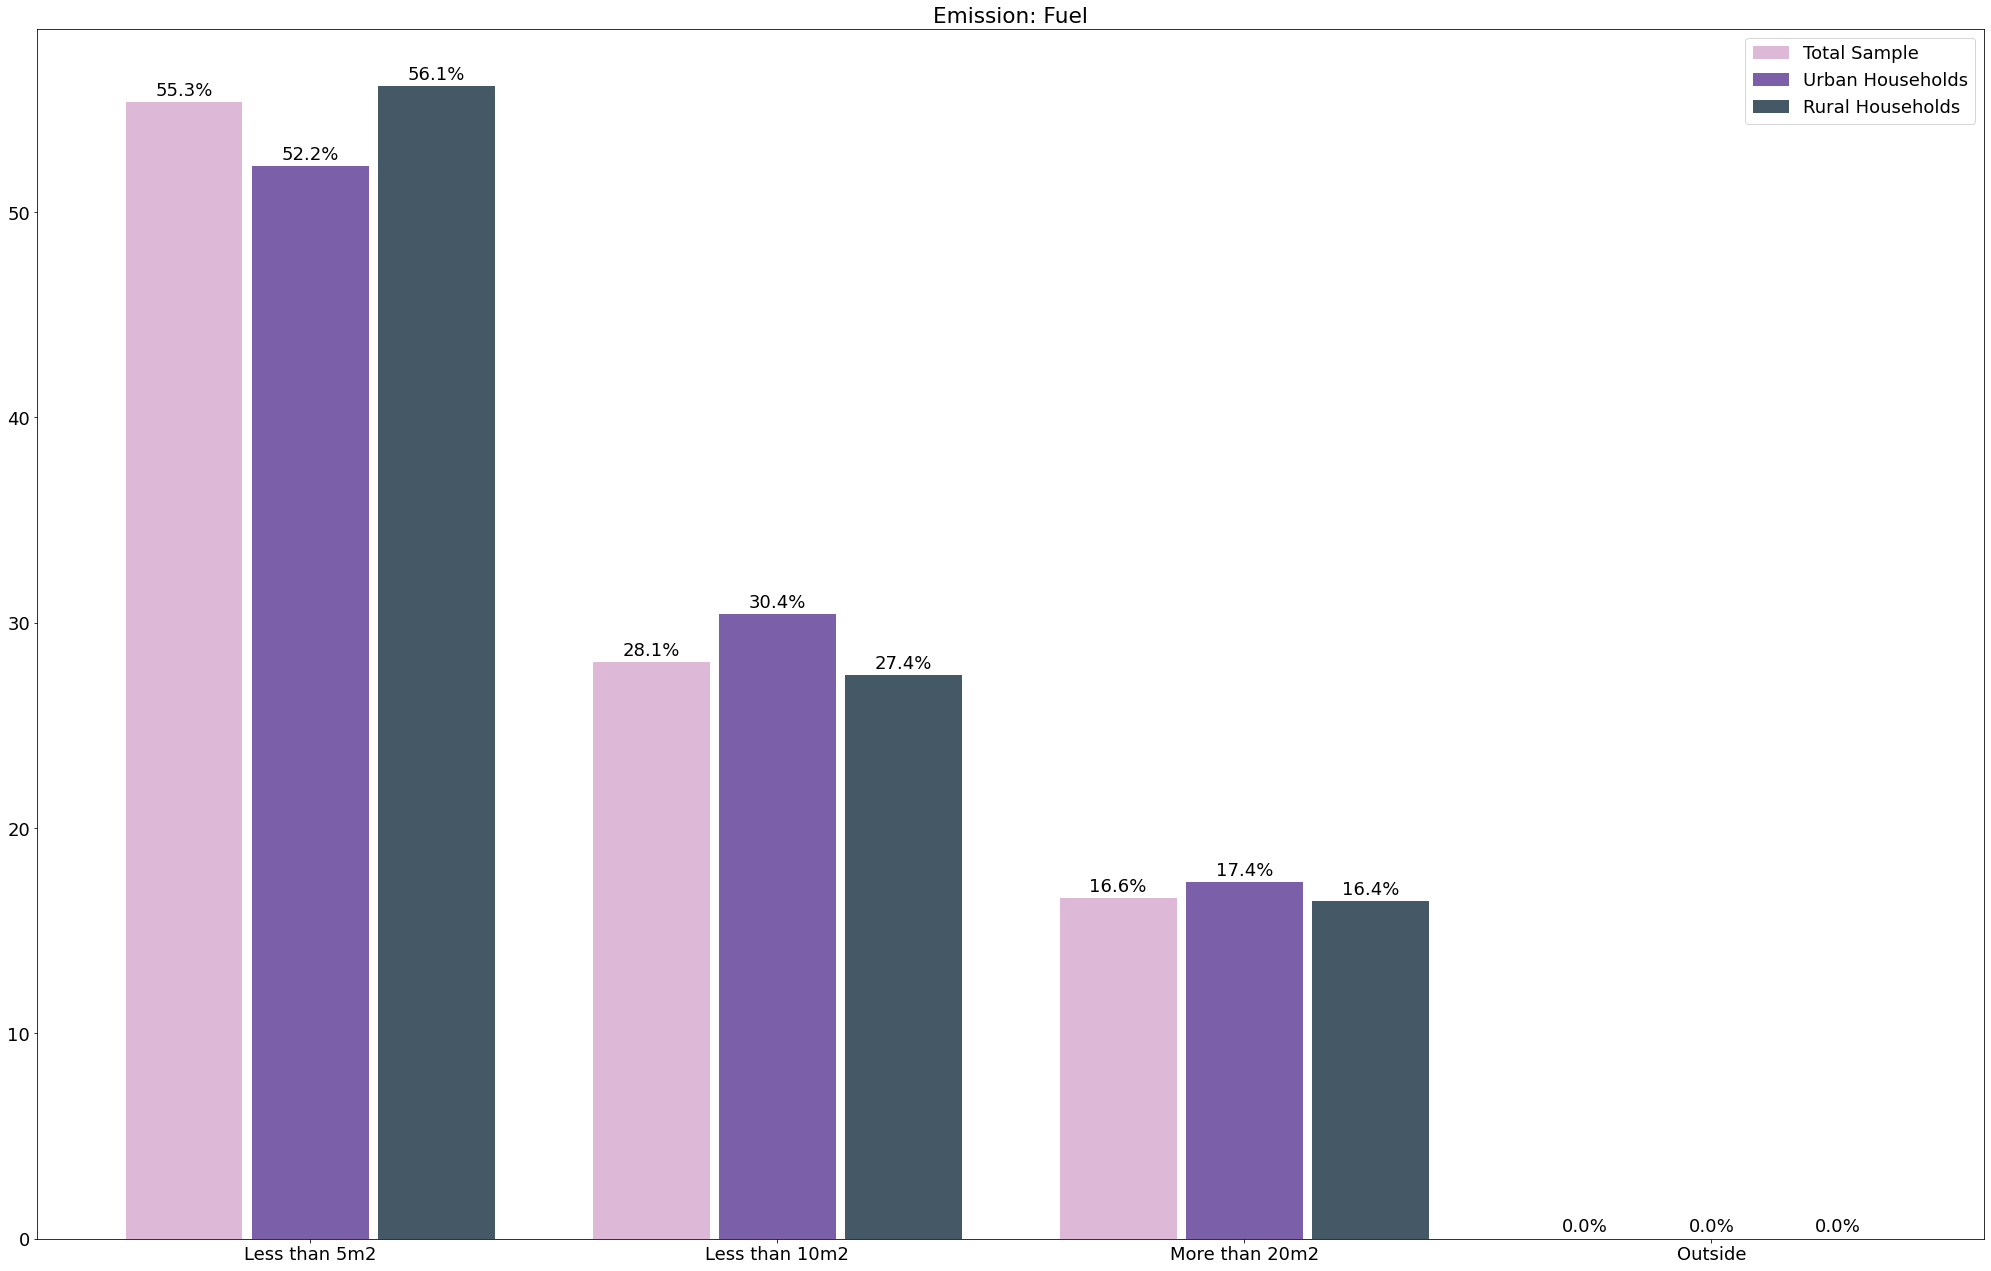

In [41]:
# No information about Tier-relation here, even if I used this plot
plot_tier_distribution(data_I15,'Size_kitchen',values=[0,1,2,5],
                       labels= ['Less than 5m2', 'Less than 10m2', 'More than 20m2','Outside'],
                       title='Emission: Fuel')


We then consider the questions:  
**I.16: How many doors and windows (opening to the outside) does the main cooking space have?**

**I.17: Do you usually use a chimney, hood or other exhaust system while using this stove?**  

**I.14: In the last 12 months, where did you normally cook with the cookstove?**

In [42]:
data_I16 = main[['Household Identification','I16_How many doors and windows','I14_where did you normally cook with the cookstove','I17_use of a chimney','habitat']].dropna()
data_I16


,Household Identification,I16_How many doors and windows,I14_where did you normally cook with the cookstove,I17_use of a chimney,habitat
0,1102020811001,6.0,3,2.0,urban
4,1102020811005,1.0,3,1.0,urban
5,1102020811006,1.0,3,1.0,urban
6,1102020811007,2.0,3,2.0,urban
10,1102020811011,2.0,3,2.0,urban
...,...,...,...,...,...
3282,5712050557080,4.0,3,1.0,rural
3283,5714040157019,1.0,1,2.0,urban
3286,5714040157074,2.0,1,2.0,rural
3291,5714040157079,2.0,1,2.0,rural


In [48]:
Windows_tier = []
windows_question = 'I16_How many doors and windows'
place_question = 'I14_where did you normally cook with the cookstove'
chimney_question = 'I17_use of a chimney'
windows_case = []

for index,row in data_I16.iterrows(): 
    #If use a chimney 
    if row[chimney_question] == 1:
        Windows_tier.append(4)
        windows_case.append(2)
    else:
        # If indoor
        if row[place_question] == 1 or row[place_question] == 2 or row[place_question] == 3:
            if row[windows_question] <= 1:
                Windows_tier.append(0)  
                windows_case.append(0)
            elif row[windows_question] == 2:
                Windows_tier.append(1)
                windows_case.append(0)
            elif row[windows_question] > 2 and row[windows_question] <= 3:
                Windows_tier.append(2)
                windows_case.append(0)
            elif row[windows_question] >= 3:
                Windows_tier.append(3)
                windows_case.append(1)
            else:
                Windows_tier.append(np.nan)
                windows_case.append(np.nan)
            
        #If use a veranda
        elif row[place_question] == 4 :
            Windows_tier.append(4)
            windows_case.append(2)
        #If outdoor 
        elif row[place_question] == 5:
            Windows_tier.append(5)
            windows_case.append(2)
        else:
            Windows_tier.append(np.nan)
            windows_case.append(np.nan)
        
        

        
data_I16['Windows_tier'] = Windows_tier
data_I16['windows_case'] = windows_case

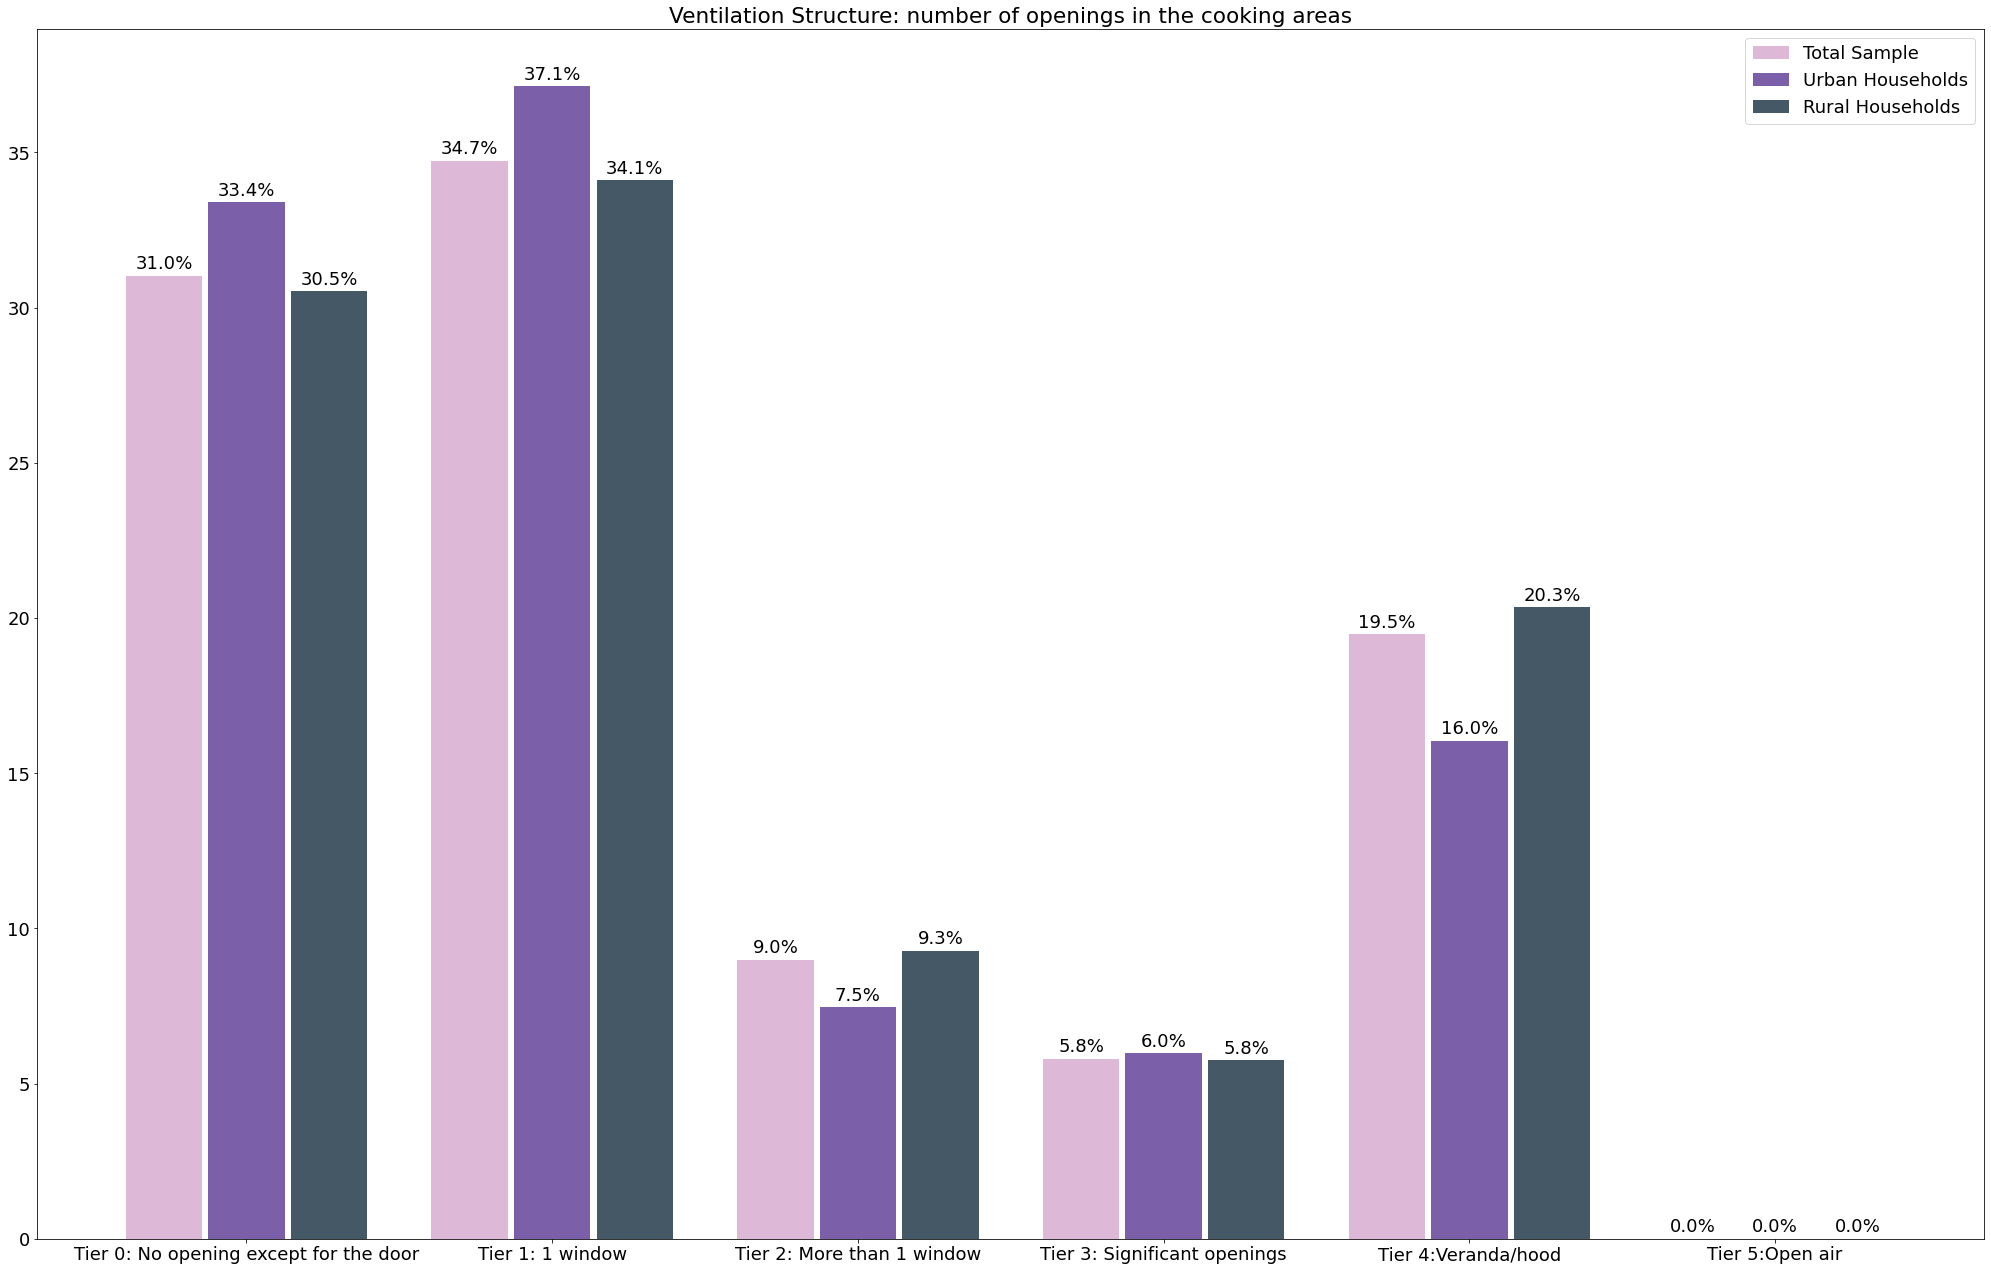

In [112]:
plot_tier_distribution(data_I16,'Windows_tier',values=[0,1,2,3,4,5],
                       labels= ['Tier 0: No opening except for the door', 'Tier 1: 1 window','Tier 2: More than 1 window','Tier 3: Significant openings', 'Tier 4:Veranda/hood', 'Tier 5:Open air'],
                       title='Ventilation Structure: number of openings in the cooking areas')



In order to compare with the MTF data report, we plot the same data differently, as bellow:

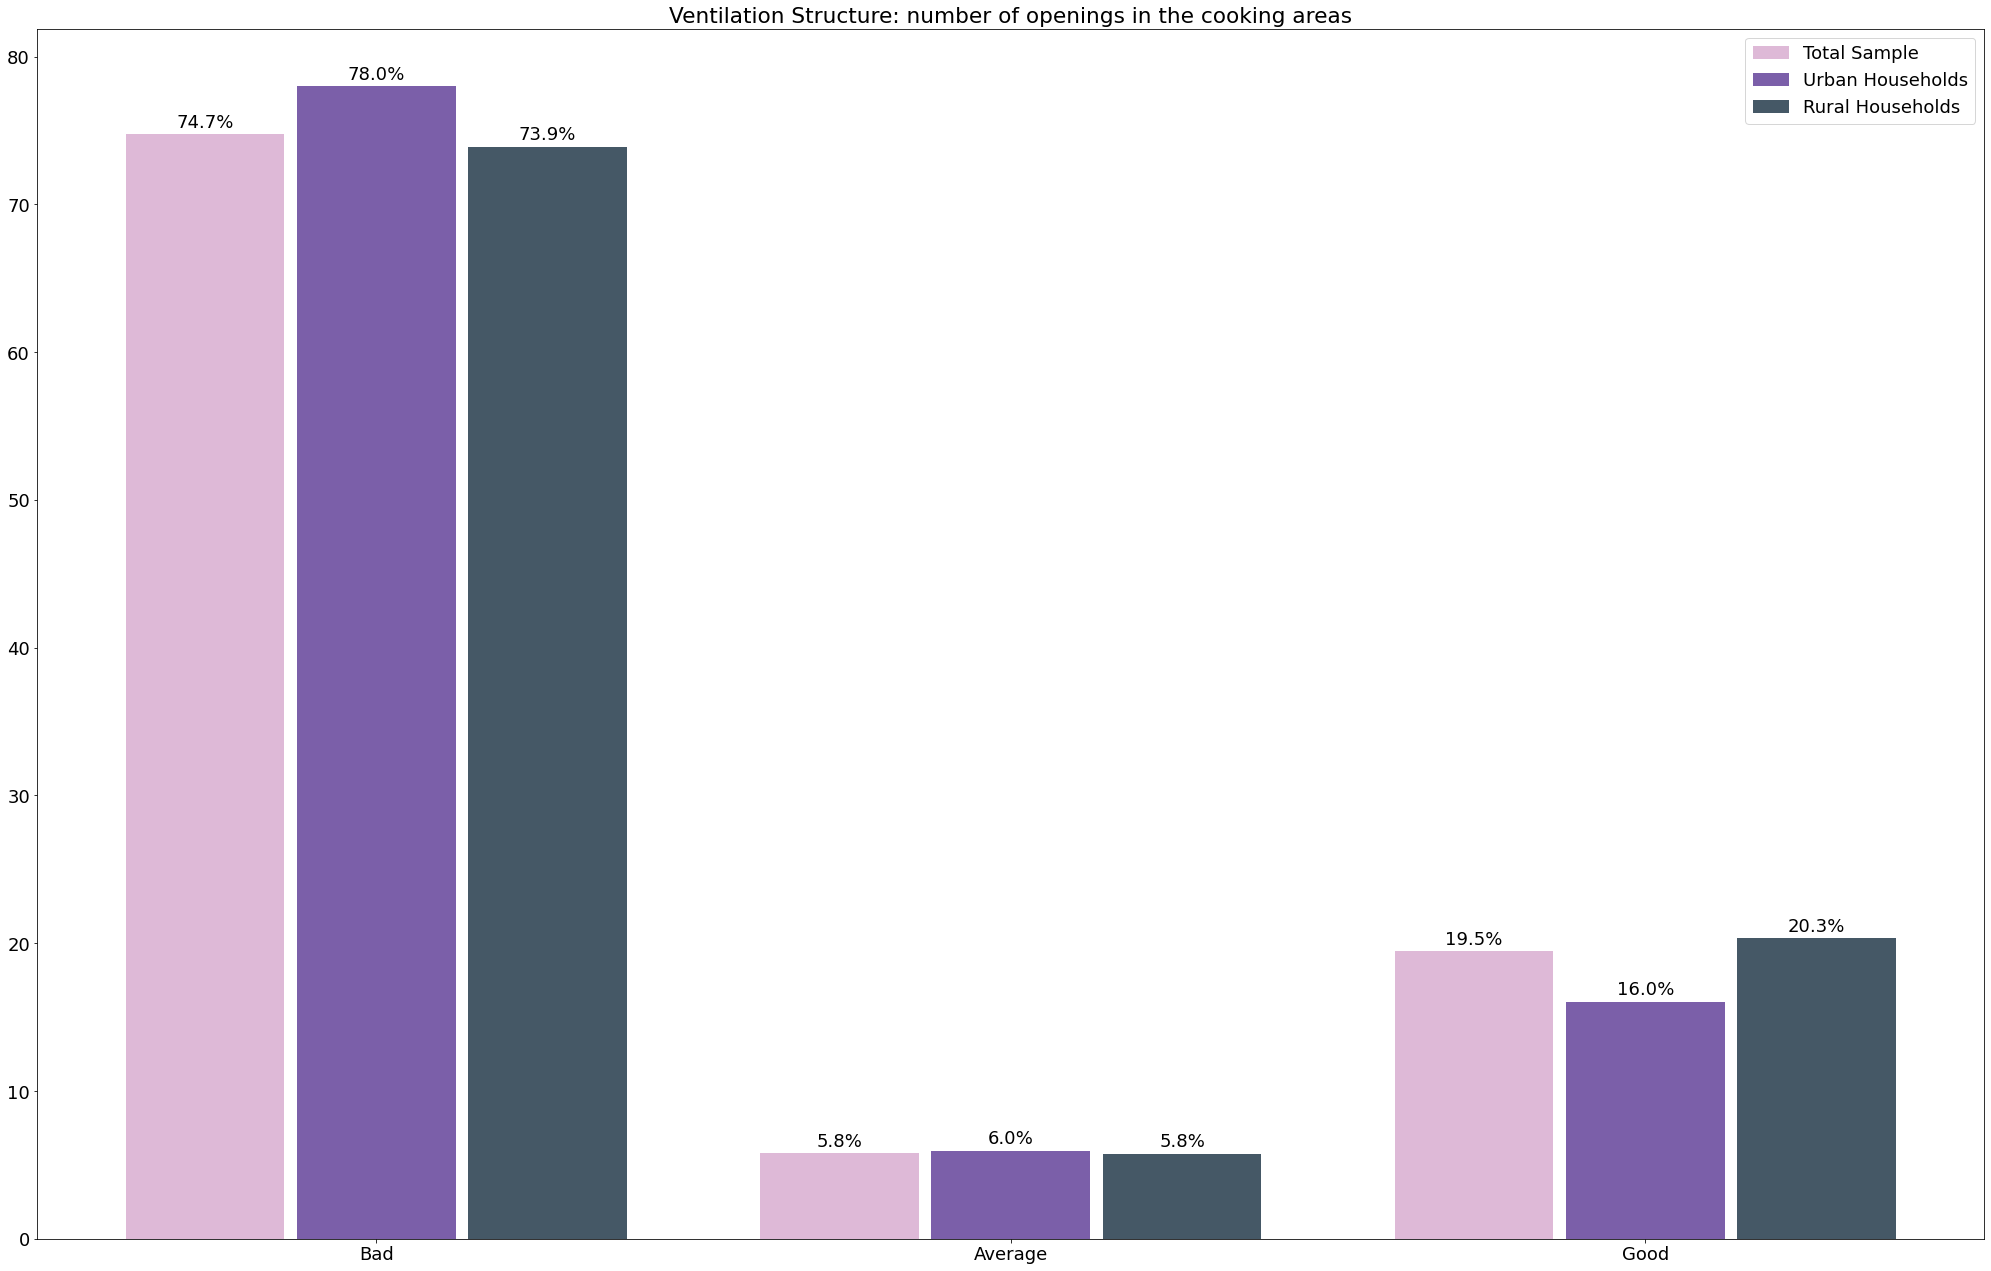

In [49]:
plot_tier_distribution(data_I16,'windows_case',values=[0,1,2],
                       labels= ['Bad', 'Average','Good'],
                       title='Ventilation Structure: number of openings in the cooking areas')


**According to the MTF report:**

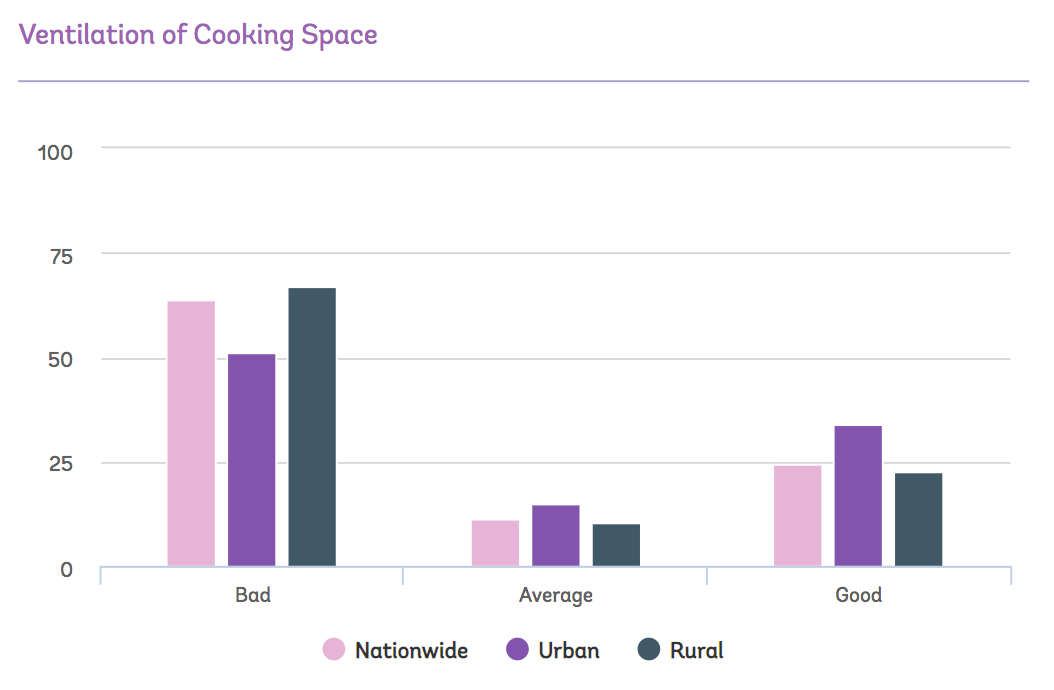

In [47]:
Image('images/ventilation_cooking.png')

Our results are in line with the above plot from the MTF report (same order of magnitude).